In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency,ttest_ind,f_oneway,mannwhitneyu
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('bird_strikes.csv')
data.head(3)

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23T00:00:00,Caused damage,2,US AIRWAYS*,New York,Climb,NaN,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,30736,1500.0,0,True
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25T00:00:00,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,0,0.0,0,False
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14T00:00:00,No damage,2,BUSINESS,Louisiana,Approach,NaN,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,False,0,50.0,0,False


In [3]:
data.shape

(25558, 26)

In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   record_id                                25558 non-null  int64  
 1   aircraft_type                            25429 non-null  object 
 2   airport_name                             25429 non-null  object 
 3   altitude_bin                             25429 non-null  object 
 4   aircraft_make_model                      25558 non-null  object 
 5   wildlife_number_struck                   25429 non-null  object 
 6   wildlife_number_struck_actual            25558 non-null  int64  
 7   effect_impact_to_flight                  2078 non-null   object 
 8   flightdate                               25429 non-null  object 
 9   effect_indicated_damage                  25558 non-null  object 
 10  aircraft_number_of_engines               25291

In [4]:
data.isnull().sum()

aircraft_type                                129
airport_name                                 129
altitude_bin                                 129
aircraft_make_model                            0
wildlife_number_struck                       129
wildlife_number_struck_actual                  0
effect_impact_to_flight                    23480
flightdate                                   129
effect_indicated_damage                        0
aircraft_number_of_engines                   267
aircraft_airline_operator                    129
origin_state                                 449
when_phase_of_flight                         129
conditions_precipitation                   23543
remains_of_wildlife_collected                  0
remains_of_wildlife_sent_to_smithsonian        0
remarks                                     4771
wildlife_size                                129
conditions_sky                                 0
wildlife_species                               0
pilot_warned_of_bird

In [7]:
data.describe()

,record_id,wildlife_number_struck_actual,cost_total,feet_above_ground,number_of_people_injured
count,25558.000000,25558.000000,2.555800e+04,25429.000000,25558.000000
mean,253916.085609,2.691525,5.567354e+03,799.028432,0.001056
std,38510.453382,12.793975,1.219713e+05,1740.079843,0.050420
min,1195.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,225783.750000,1.000000,0.000000e+00,0.000000,0.000000
50%,248749.000000,1.000000,0.000000e+00,50.000000,0.000000
75%,269168.750000,1.000000,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,1.239775e+07,18000.000000,6.000000


- Most incidents involve 1 bird strike, indicating that single bird strikes are the most common scenario.
- There are rare instances of up to 942 birds involved in a single incident. These extreme cases could result in significant operational disruptions or safety risks.
- Half of the incidents incur zero direct financial costs, suggesting that many bird strikes do not result in any financial damage.
-  The maximum recorded cost is approximately 12.4 million
- The majority of the bird strike occur below 50 feet which corresponds to takeoff and landing
-  Strikes have occurred as high as 18,000 feet, though these are outliers
- Most incidents do not result in injuries (mean of ~0, median of 0). The rare occurrences where injuries occur (maximum of 6) suggest that strikes rarely pose direct harm to passengers or crew.

In [8]:
data['record_id'].duplicated().sum()

0

In [3]:
# RECORD IS THE UNIQUE IDENTIFIER
data.set_index('record_id',inplace=True)
data.head(2)

,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
record_id,,,,,,,,,,,,,,,,,,,,,,,,,
202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23T00:00:00,Caused damage,2,US AIRWAYS*,New York,Climb,NaN,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,30736,1500.0,0,True
208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25T00:00:00,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,0,0.0,0,False


In [10]:
data.describe(include=object).T

,count,unique,top,freq
aircraft_type,25429,1,Airplane,25429
airport_name,25429,1109,DALLAS/FORT WORTH INTL ARPT,803
altitude_bin,25429,2,< 1000 ft,20556
aircraft_make_model,25558,351,B-737-700,2488
wildlife_number_struck,25429,4,1,20790
effect_impact_to_flight,2078,4,Precautionary Landing,1121
flightdate,25429,4225,2010-10-28T00:00:00,28
effect_indicated_damage,25558,2,No damage,23081
aircraft_number_of_engines,25291,5,2,23025
aircraft_airline_operator,25429,292,SOUTHWEST AIRLINES,4628


- Most incidents involve airplanes
- Southwest airlines has the highest number of reported incidents which could be due to their large operational scale
- The most common aircraft model is the Boeing 737-700 with 2,488 incidents
- Most aircraft have two engines
- Dallas/Fort Worth International Airport is the top airport for bird strikes with 803 incidents.
- Bird strikes are most frequent during the Approach phase
- Most incidents occur below 1,000 feet 
- The most commonly struck wildlife is small, unknown birds
- Rain is the most frequent precipitation condition associated with incidents
- No cloud cover is reported in 12,642 incidents. 
- Precautionary Landing is the most common impact on flights 
- In most cases, pilots were not warned about birds or wildlife beforehand 
- Most incidents involve smaller aircraft 

<Axes: >

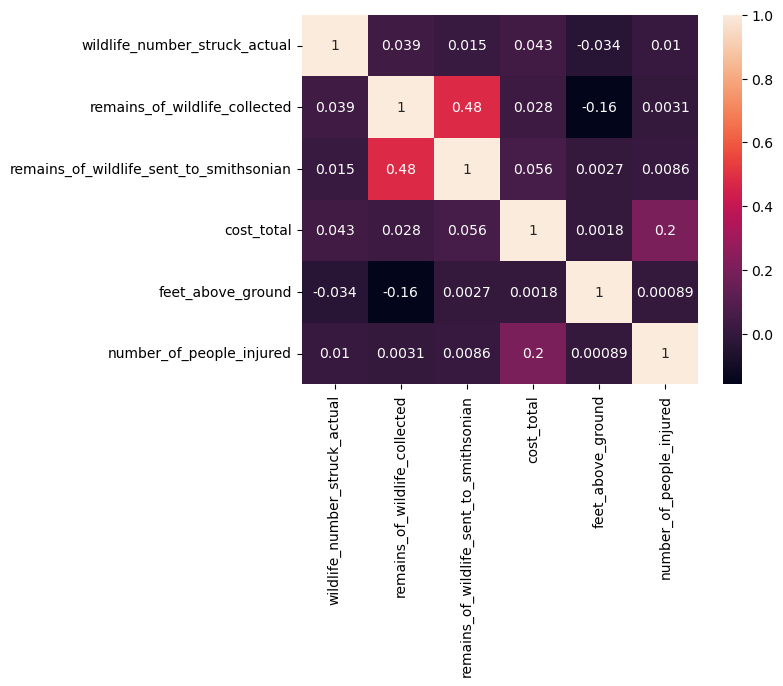

In [11]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

<Axes: ylabel='count'>

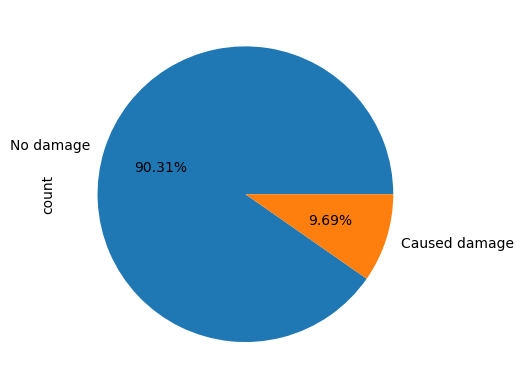

In [12]:
data['effect_indicated_damage'].value_counts().plot.pie(autopct='%.2f%%')

**record_id** we have all unique id's for each record

**aircraft_type** all the records in aircraft_type is aeroplane

**airport_name**

<Axes: xlabel='airport_name'>

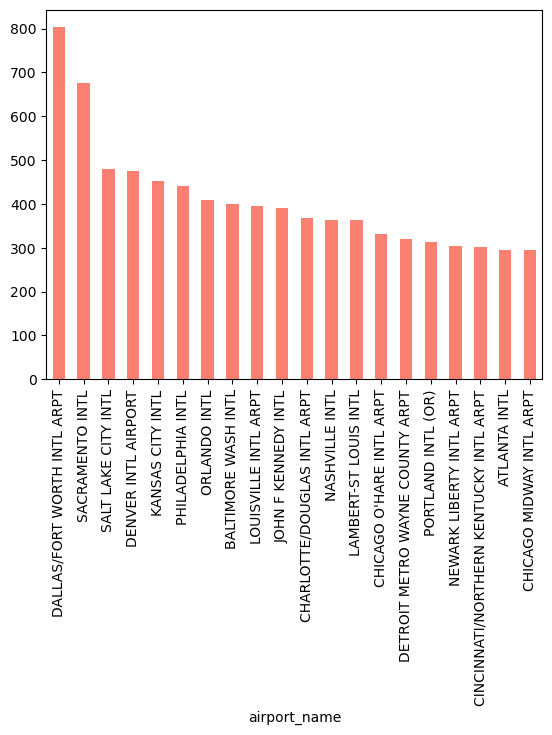

In [13]:
data['airport_name'].value_counts().head(20).plot(kind = 'bar',color='Salmon')

In [14]:
top_20_aircraft = data['airport_name'].value_counts().head(10).index
top_20_data = data[data['airport_name'].isin(top_20_aircraft)]

In [15]:
crosstab = pd.crosstab(top_20_data['airport_name'], top_20_data['effect_indicated_damage'],normalize='index') * 100

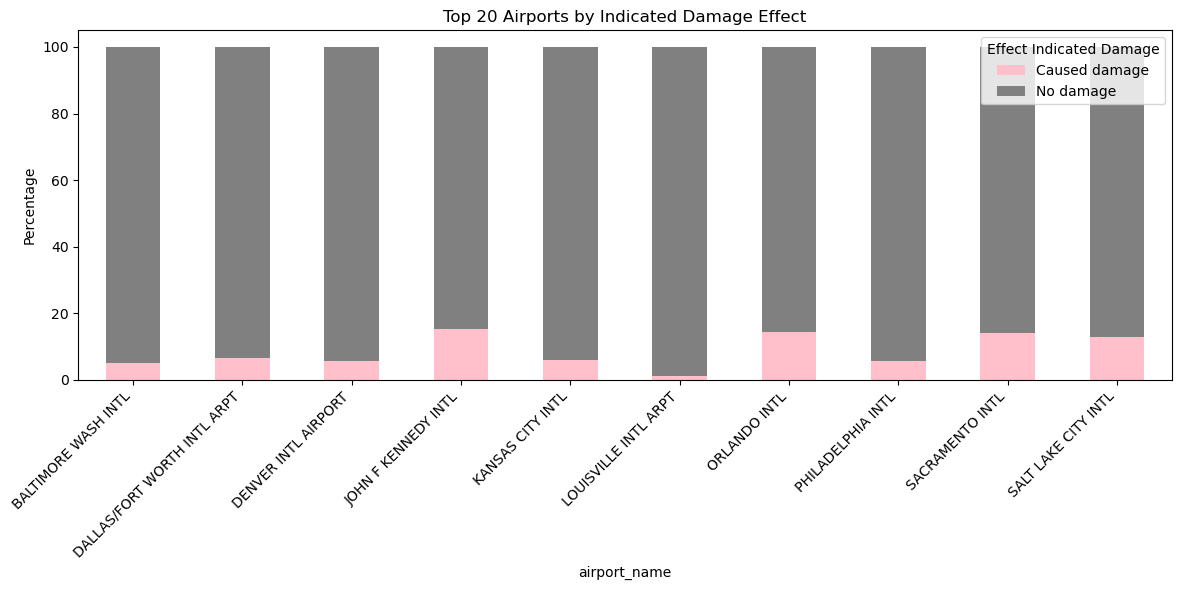

In [16]:
crosstab.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(12, 6)
)

plt.ylabel('Percentage')
plt.title('Top 20 Airports by Indicated Damage Effect')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Effect Indicated Damage')
plt.tight_layout()
plt.show()

John F Kennedy, Orlando, Sacramento, Salt Lake city international experience the highest levels of damage caused by bird strikes, potentially leading to increased operational costs, higher maintenance requirements.

**altitude_bin**

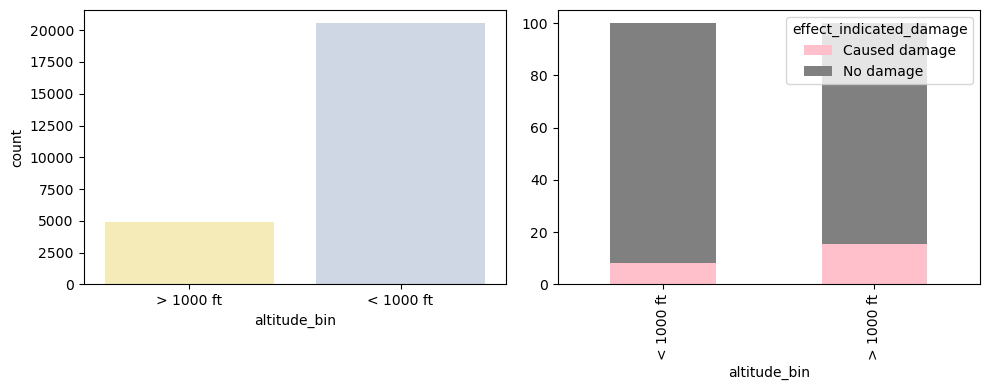

In [54]:
count_data = pd.crosstab(data['altitude_bin'], data['effect_indicated_damage'],normalize='index') * 100

# Plot the stacked bar plot
plt.figure(figsize=(10, 4))
count_data.plot(kind='bar', stacked=True, ax=plt.subplot(1, 2, 2),color = ['pink','grey'])
sns.countplot(data=data, x='altitude_bin', ax=plt.subplot(1, 2, 1),palette='Pastel2_r')

plt.tight_layout()
plt.show()


**aircraft_make_model**

<Axes: xlabel='aircraft_make_model'>

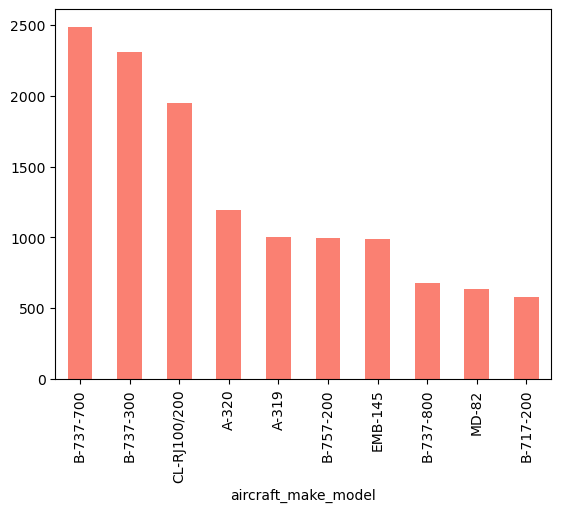

In [25]:
top_20_aircraft = data['aircraft_make_model'].value_counts().head(10)
top_20_aircraft.plot(kind='bar',color = 'Salmon')

In [27]:
top_20_aircraft = data['aircraft_make_model'].value_counts().head(10).index
top_20_data = data[data['aircraft_make_model'].isin(top_20_aircraft)]

In [28]:
crosstab = pd.crosstab(top_20_data['aircraft_make_model'], top_20_data['effect_indicated_damage'],normalize='index') * 100

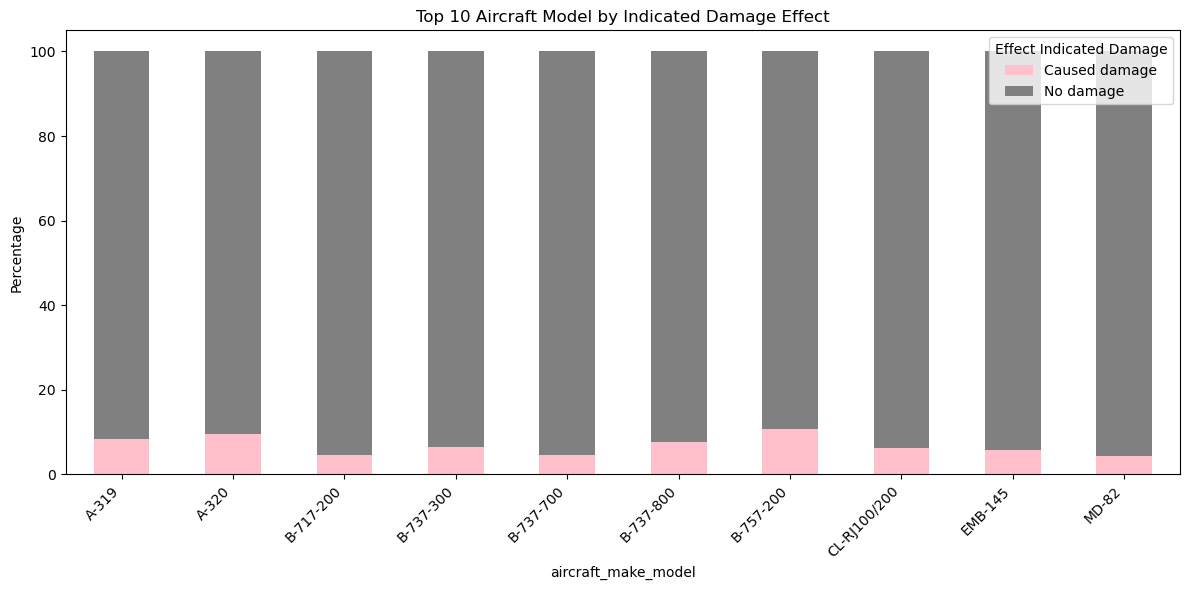

In [30]:
crosstab.plot(
    kind='bar',
    stacked=True,
    color=['pink','grey'],
    figsize=(12, 6)
)

plt.ylabel('Percentage')
plt.title('Top 10 Aircraft Model by Indicated Damage Effect')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Effect Indicated Damage')
plt.tight_layout()
plt.show()

**wildlife_number_struck**

In [31]:
crosstab = pd.crosstab(data['wildlife_number_struck'], data['effect_indicated_damage'],normalize='index') * 100

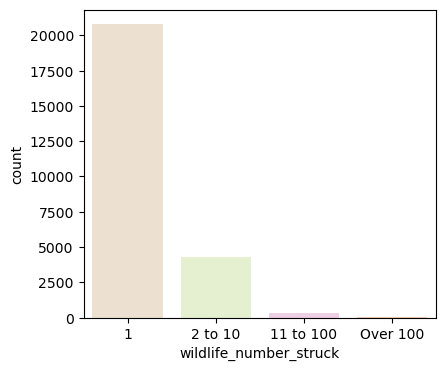

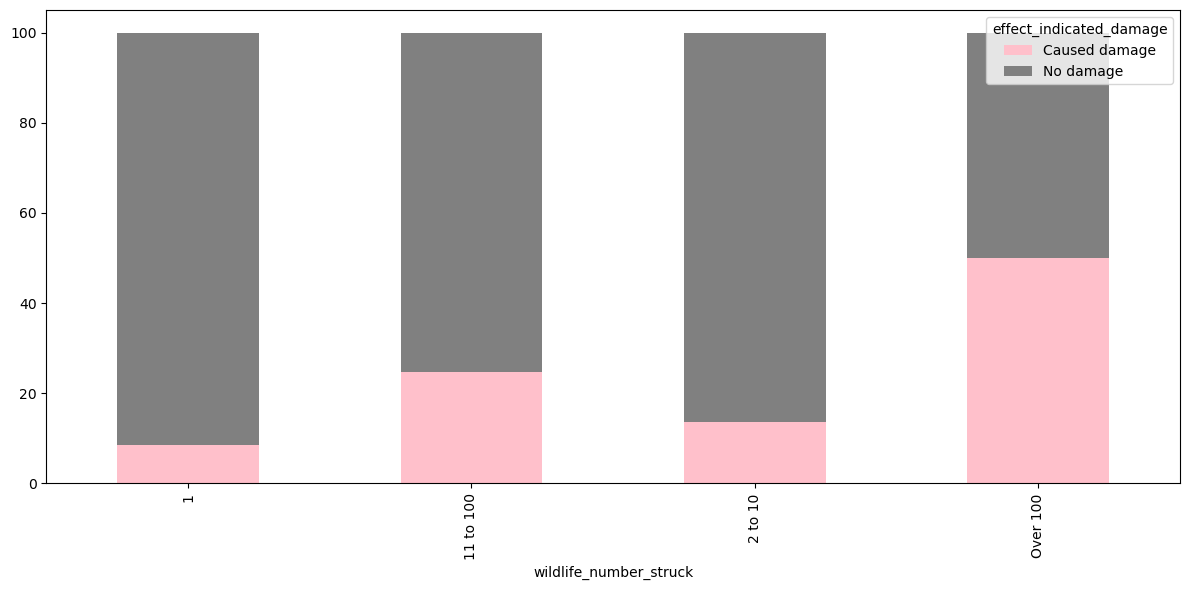

In [43]:
sort_order = data['wildlife_number_struck'].value_counts().index
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data,x='wildlife_number_struck',order= sort_order,palette='Pastel2_r')
crosstab.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(12, 6)
)

plt.tight_layout()
plt.show()

**wildlife_number_struck_actual**

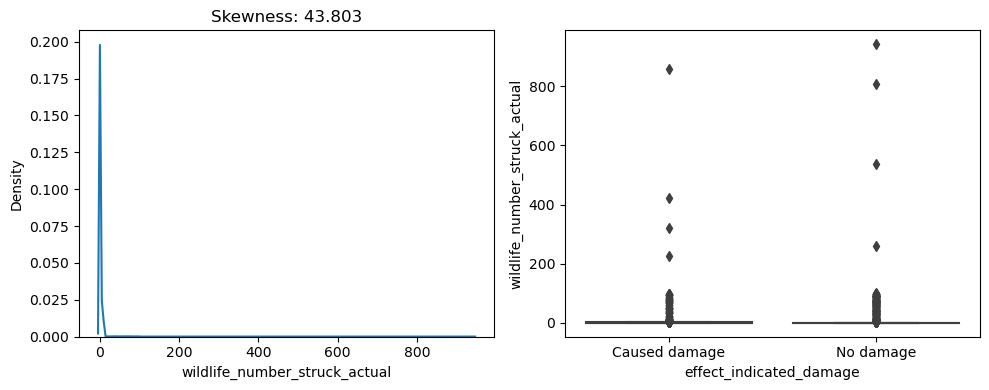

In [44]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title(f"Skewness: {round(data['wildlife_number_struck_actual'].skew(), 3)}")
sns.kdeplot(data,x='wildlife_number_struck_actual')
plt.subplot(1,2,2)
sns.boxplot(data, y = 'wildlife_number_struck_actual',x='effect_indicated_damage')
plt.tight_layout()
plt.show()

**effect_impact_to_flight**

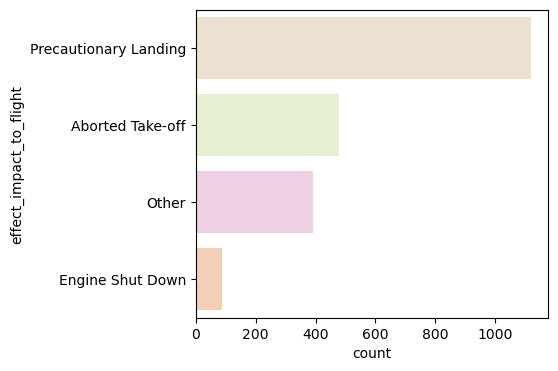

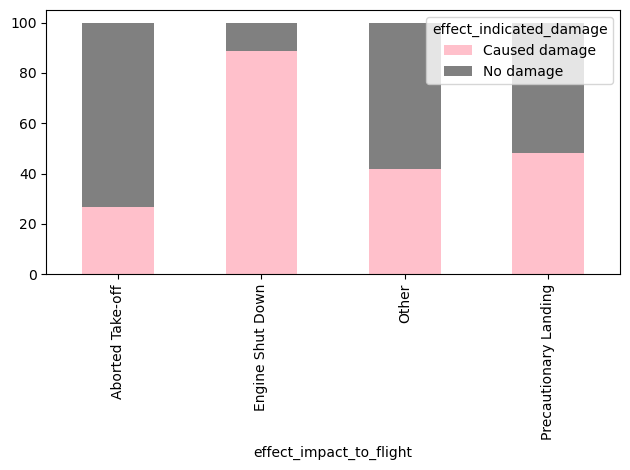

In [53]:
sort_order = data['effect_impact_to_flight'].value_counts().index
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data,y='effect_impact_to_flight',order=sort_order,palette='Pastel2_r')
ef_data = pd.crosstab(data['effect_impact_to_flight'],data['effect_indicated_damage'],normalize='index') * 100
ef_data.plot(kind='bar',stacked=True,color=['pink','grey'])
plt.tight_layout()
plt.show()

**aircraft_number_of_engines**

In [55]:
crosstab = pd.crosstab(data['aircraft_number_of_engines'], data['effect_indicated_damage'],normalize='index') * 100

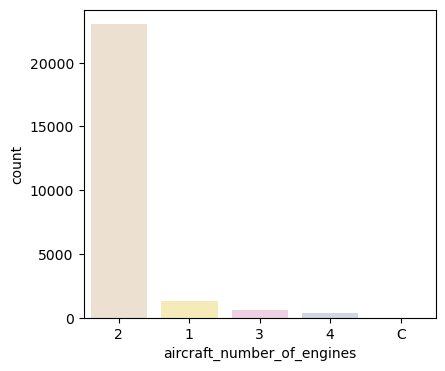

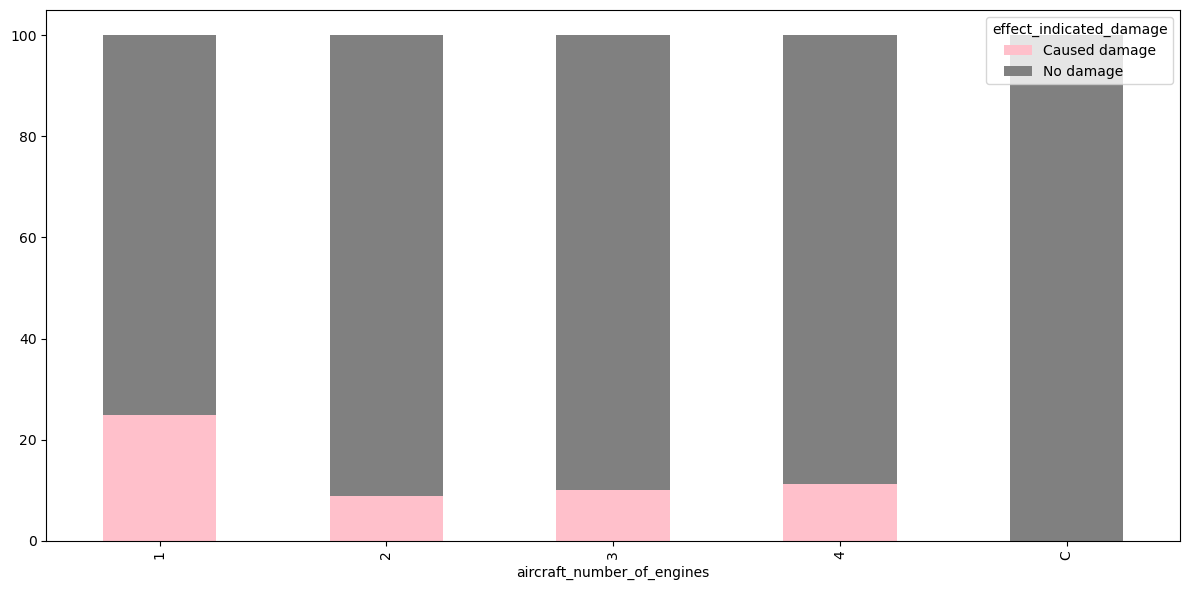

In [57]:
sort_order = data['aircraft_number_of_engines'].value_counts().index
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data,x='aircraft_number_of_engines',order=sort_order,palette='Pastel2_r')
crosstab.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(12, 6)
)
plt.tight_layout()
plt.show()

In [58]:
# There is only one aircraft on record_id 206990 which have enhine type 'C'.
data[data['aircraft_number_of_engines'] == 'C']

,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
record_id,,,,,,,,,,,,,,,,,,,,,,,,,
206990,Airplane,MORGANTOWN MUNICIPAL ARPT,> 1000 ft,RKWLTRBO 690,1,1,NaN,2001-11-05T00:00:00,No damage,C,BUSINESS,West Virginia,Descent,NaN,False,False,PILOT ADZ NO DMG. INFO RELAYED TO CKB THRU MGW...,Medium,No Cloud,Unknown bird - medium,False,0,4000.0,0,False


**aircraft_airline_operator**

<Axes: xlabel='aircraft_airline_operator'>

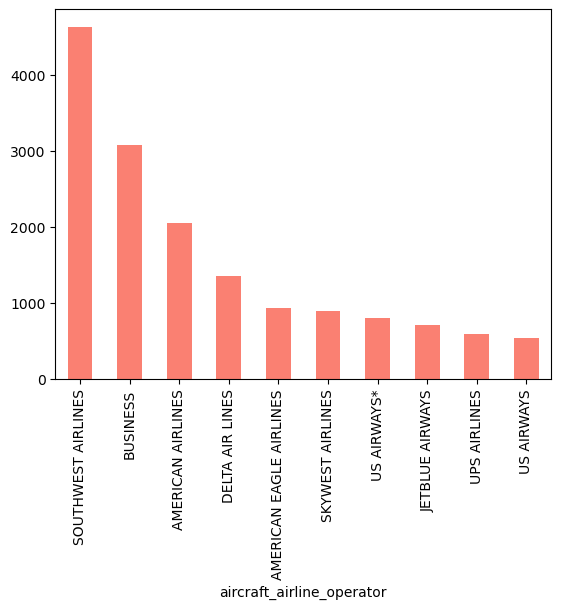

In [59]:
data['aircraft_airline_operator'].value_counts().head(10).plot(kind='bar',color='Salmon')

In [60]:
# Get the top 15 airline operators by frequency
top_airline_operators = data['aircraft_airline_operator'].value_counts().head(10).index
filtered_data = data[data['aircraft_airline_operator'].isin(top_airline_operators)]

In [61]:
airlines = pd.crosstab(filtered_data['aircraft_airline_operator'], filtered_data['effect_indicated_damage'],normalize='index') * 100

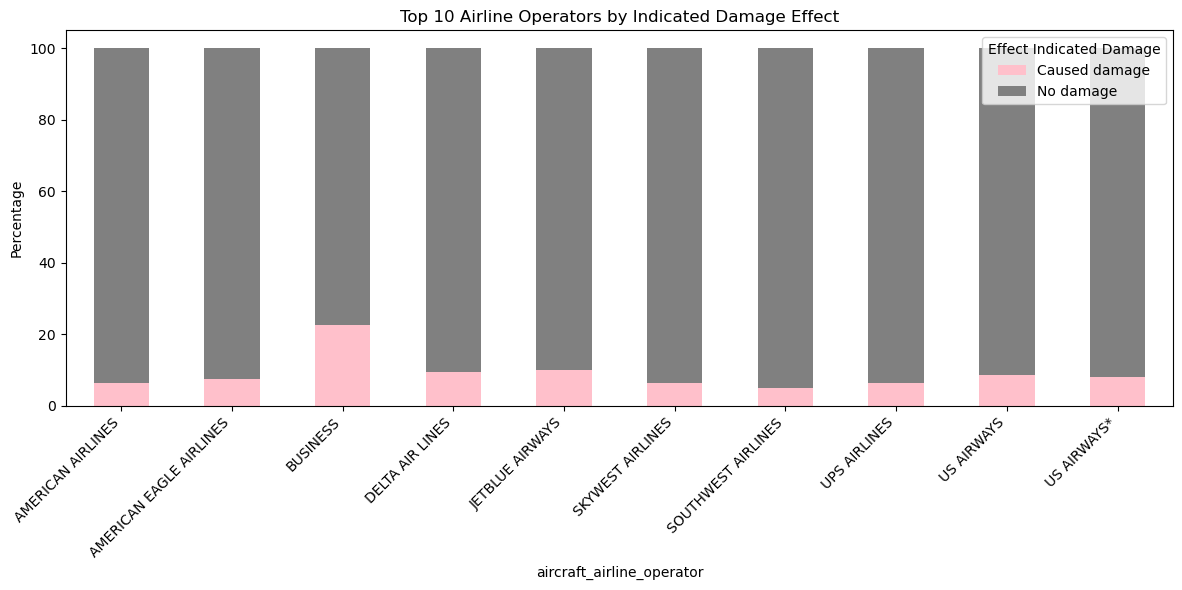

In [62]:
airlines.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(12, 6)
)

plt.ylabel('Percentage')
plt.title('Top 10 Airline Operators by Indicated Damage Effect')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Effect Indicated Damage')
plt.tight_layout()
plt.show()

**origin_state**

<Axes: xlabel='origin_state'>

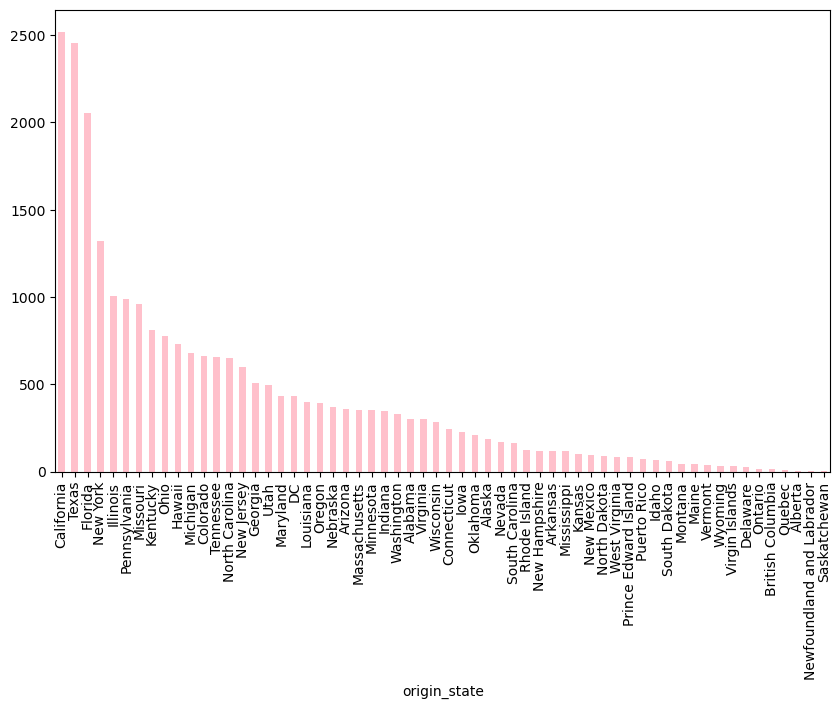

In [63]:
plt.figure(figsize=(10,6))
data['origin_state'].value_counts().plot(kind='bar',color='Pink')

In [64]:
origin = pd.crosstab(data['origin_state'],data['effect_indicated_damage'],normalize='index') * 100

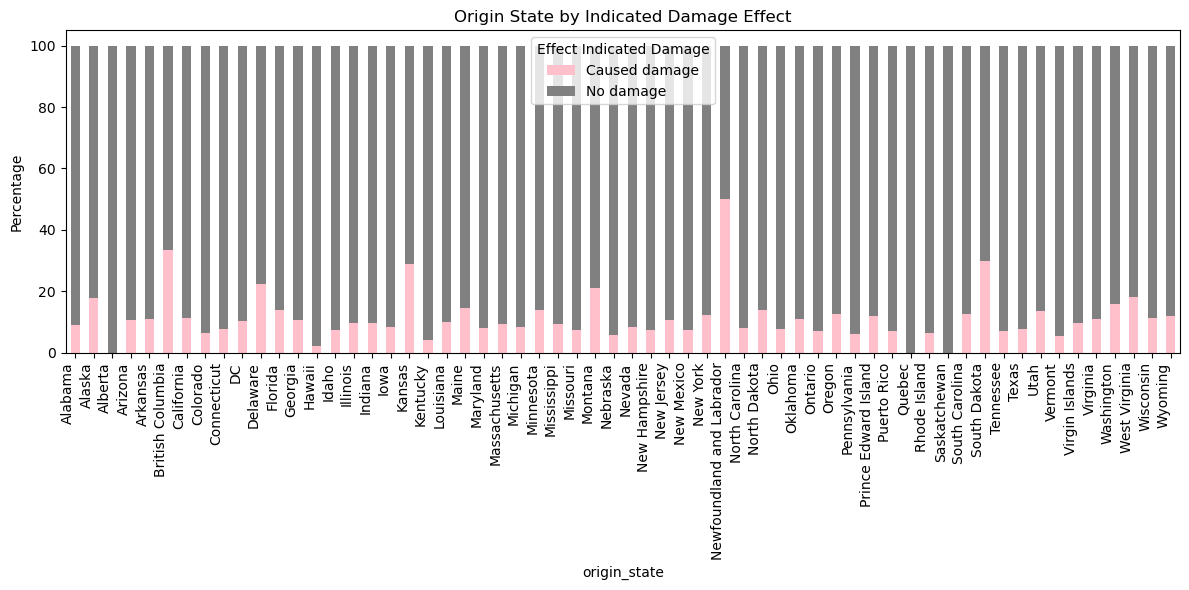

In [65]:
origin.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(12, 6)
)

plt.ylabel('Percentage')
plt.title('Origin State by Indicated Damage Effect')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Effect Indicated Damage')
plt.tight_layout()
plt.show()

**when_phase_of_flight**

In [66]:
crosstab = pd.crosstab(data['when_phase_of_flight'],data['effect_indicated_damage'],normalize='index') * 100

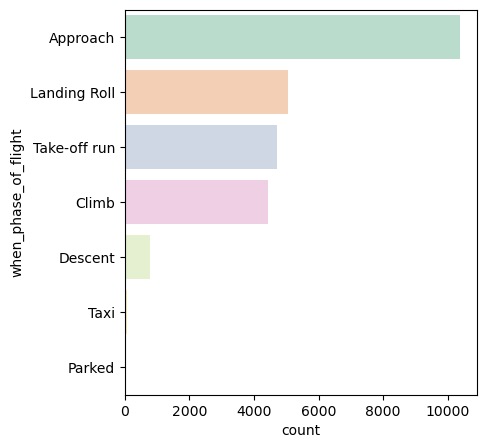

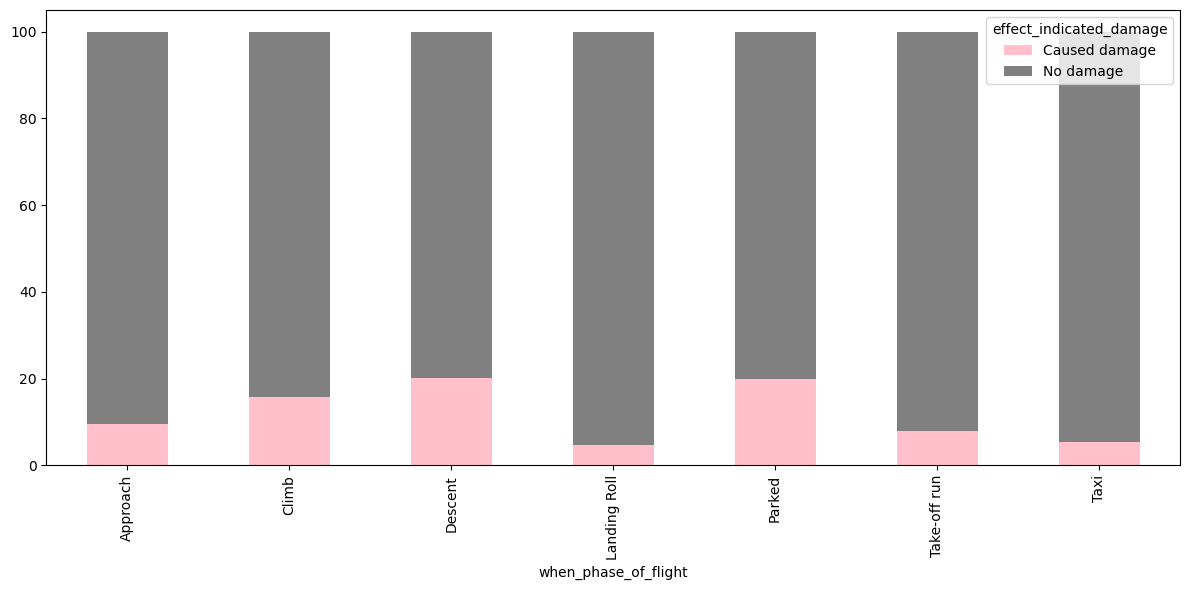

In [67]:
sort_order = data['when_phase_of_flight'].value_counts().index
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data,y='when_phase_of_flight',order=sort_order,palette='Pastel2')
crosstab.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(12, 6)
)
plt.tight_layout()
plt.show()

**conditions_precipitation**

In [68]:
crosstab = pd.crosstab(data['conditions_precipitation'],data['effect_indicated_damage'],normalize='index') * 100

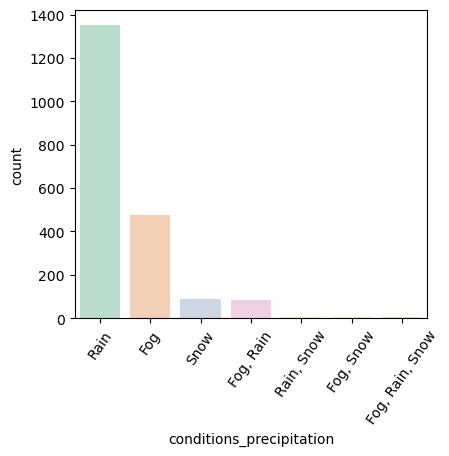

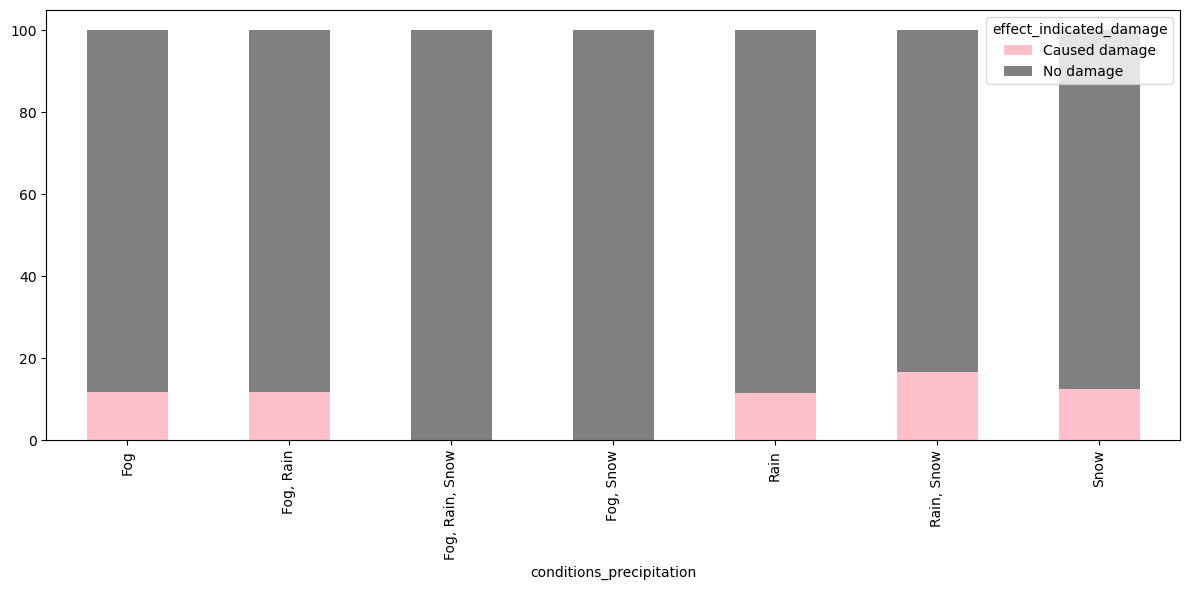

In [69]:
sort_order = data['conditions_precipitation'].value_counts().index
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data,x='conditions_precipitation',order=sort_order,palette='Pastel2')
plt.xticks(rotation=55)
crosstab.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(12, 6)
)
plt.tight_layout()
plt.show()

**remains_of_wildlife_collected**

In [70]:
crosstab = pd.crosstab(data['remains_of_wildlife_collected'],data['effect_indicated_damage'],normalize='index') * 100

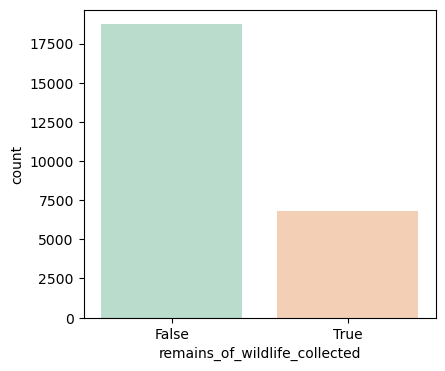

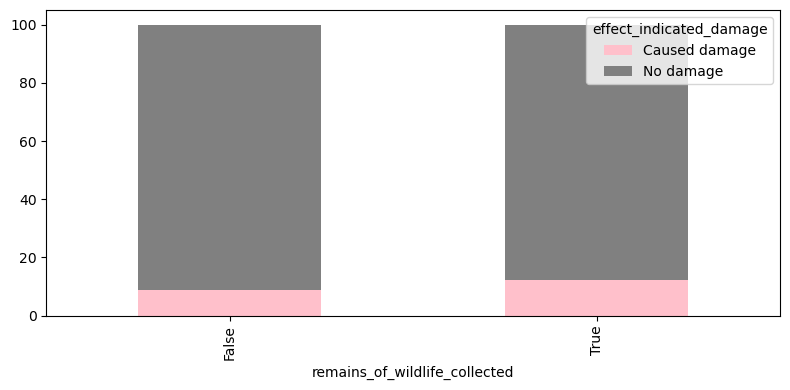

In [73]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data,x='remains_of_wildlife_collected',palette='Pastel2')
crosstab.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(8,4)
)
plt.tight_layout()
plt.show()

**remains_of_wildlife_sent_to_smithsonian**

In [74]:
crosstab = pd.crosstab(data['remains_of_wildlife_sent_to_smithsonian'],data['effect_indicated_damage'],normalize='index') * 100

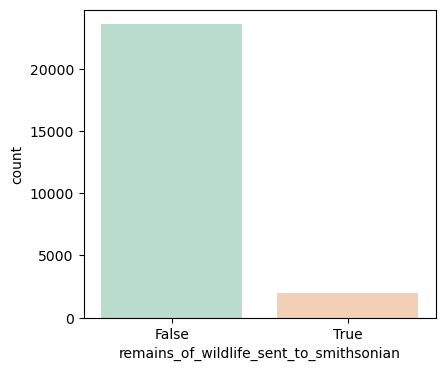

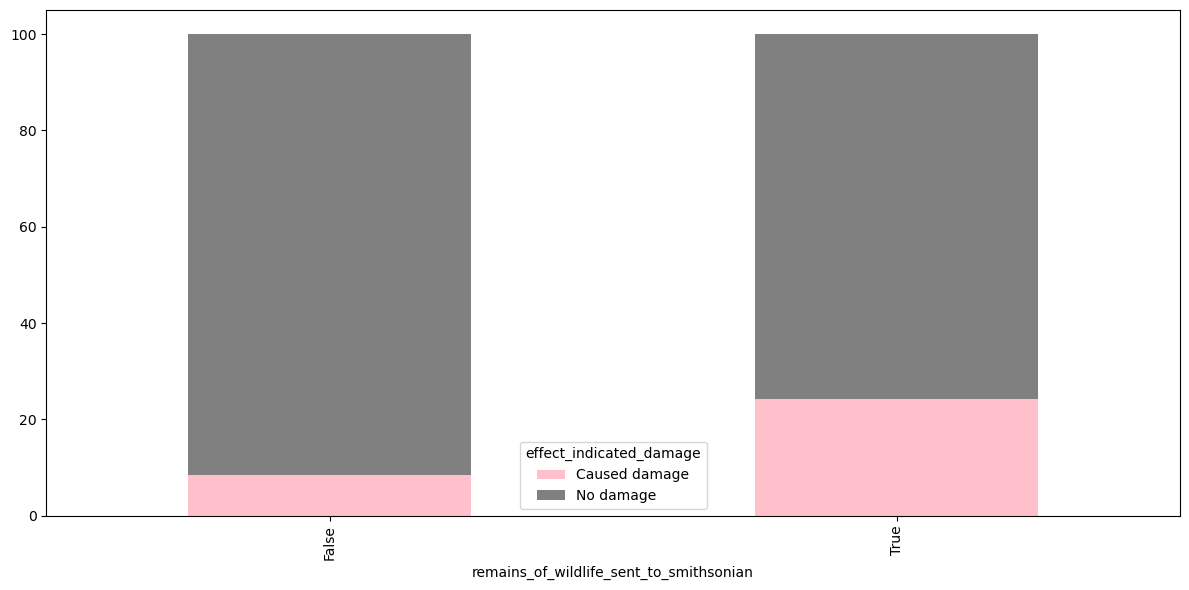

In [75]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data,x='remains_of_wildlife_sent_to_smithsonian',palette='Pastel2')
crosstab.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(12, 6)
)
plt.tight_layout()
plt.show()

**remarks**

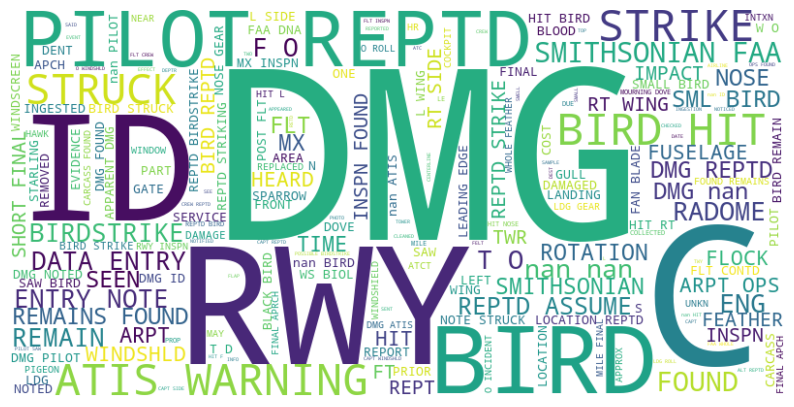

In [76]:
from wordcloud import WordCloud
text = ' '.join(data['remarks'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**wildlife_size**

In [77]:
crosstab = pd.crosstab(data['wildlife_size'],data['effect_indicated_damage'],normalize='index') * 100

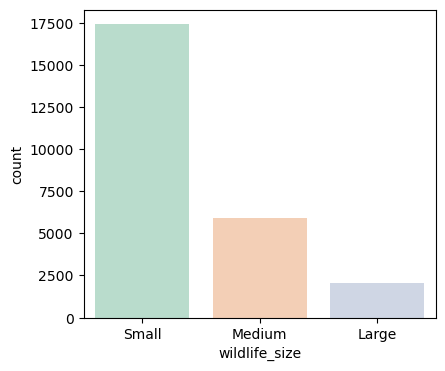

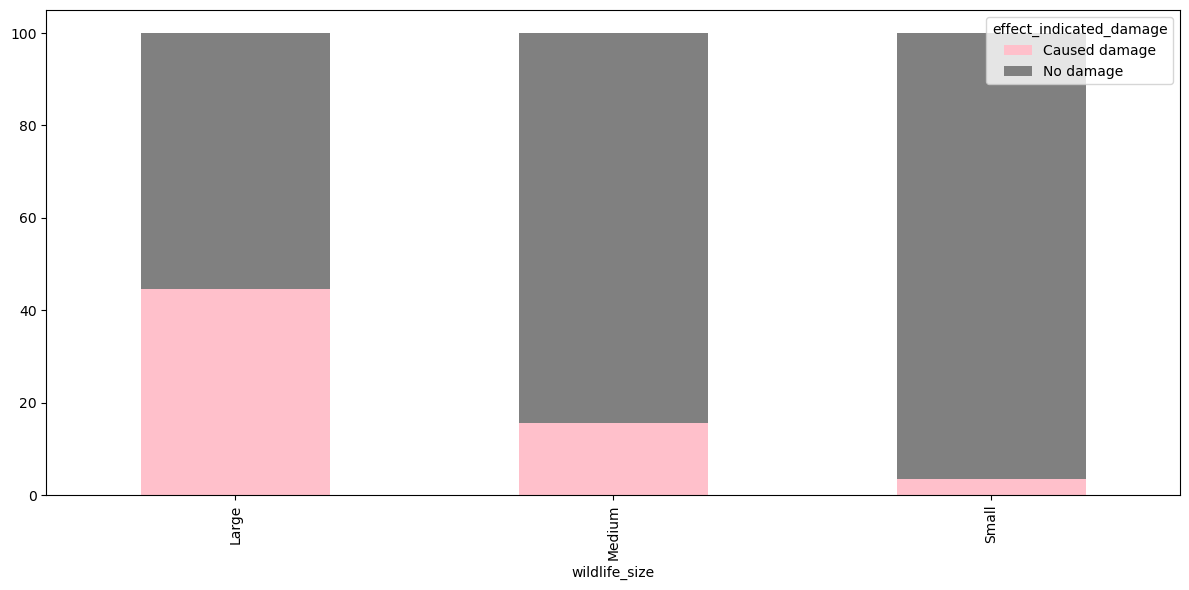

In [79]:
sort_order = data['wildlife_size'].value_counts().index
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data,x='wildlife_size',order=sort_order,palette='Pastel2')
crosstab.plot(
    kind='bar',
    stacked=True,
    color=['pink','grey'],
    figsize=(12, 6)
)
plt.tight_layout()
plt.show()

**conditions_sky**

In [80]:
crosstab = pd.crosstab(data['conditions_sky'],data['effect_indicated_damage'],normalize='index') * 100

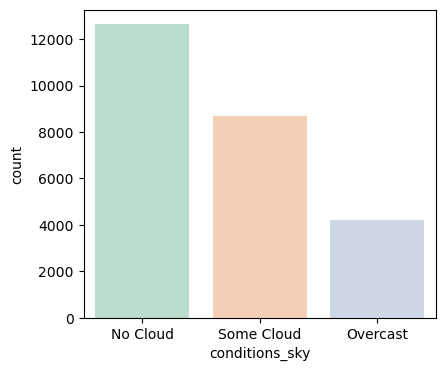

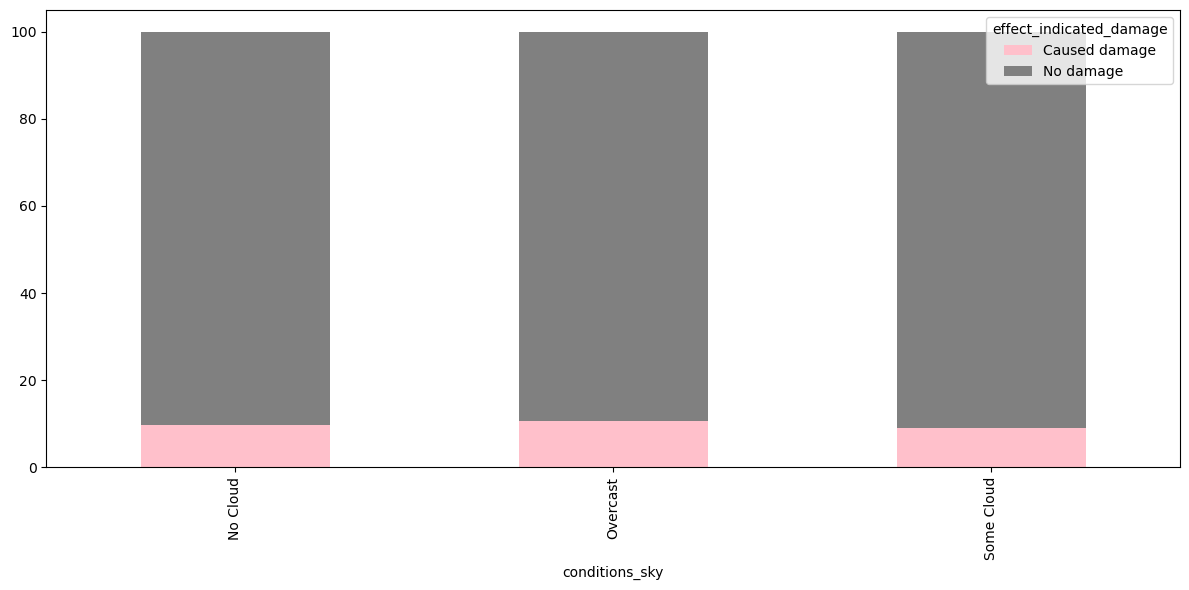

In [81]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data,x='conditions_sky',palette='Pastel2')
crosstab.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(12, 6)
)
plt.tight_layout()
plt.show()

**wildlife_species**

<Axes: title={'center': 'Top 50 wildlife species'}, xlabel='wildlife_species'>

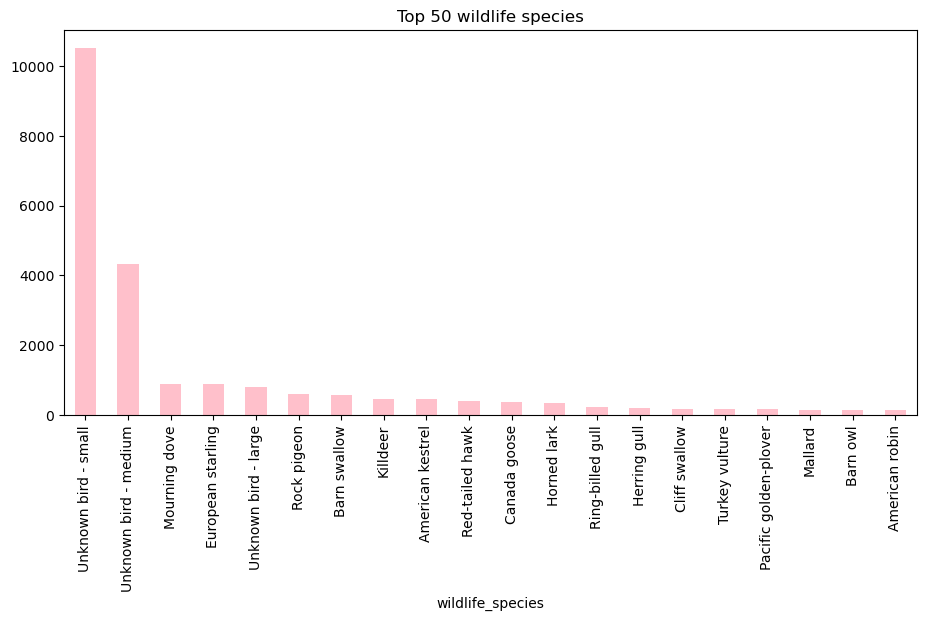

In [82]:
plt.figure(figsize=(11,5))
plt.title('Top 50 wildlife species')
data['wildlife_species'].value_counts().head(20).plot(kind='bar',color='pink')

In [83]:
top_wildlife_species = data['wildlife_species'].value_counts().head(20).index
filtered_data = data[data['wildlife_species'].isin(top_wildlife_species)]

In [84]:
wildlife = pd.crosstab(filtered_data['wildlife_species'],data['effect_indicated_damage'],normalize='index') * 100

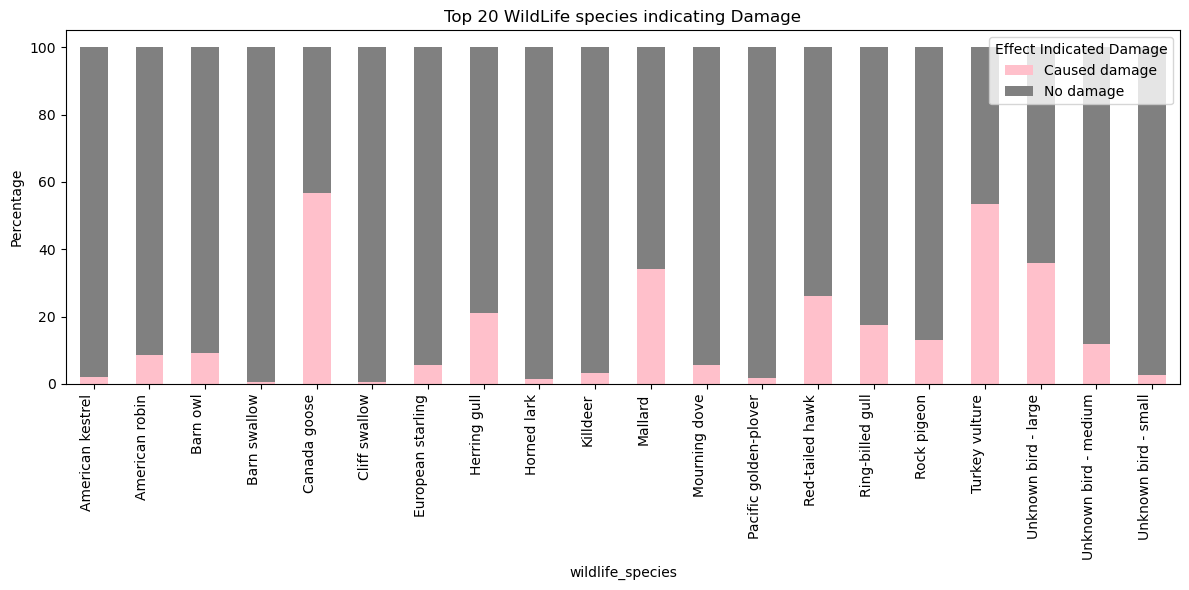

In [85]:
wildlife.plot(
    kind='bar',
    stacked=True,
    color=['pink','grey'],
    figsize=(12, 6)
)

plt.ylabel('Percentage')
plt.title('Top 20 WildLife species indicating Damage')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Effect Indicated Damage')
plt.tight_layout()
plt.show()

**pilot_warned_of_birds_or_wildlife**

In [86]:
crosstab = pd.crosstab(filtered_data['pilot_warned_of_birds_or_wildlife'],data['effect_indicated_damage'],normalize='index') * 100

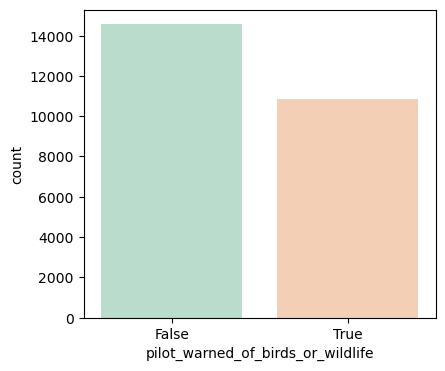

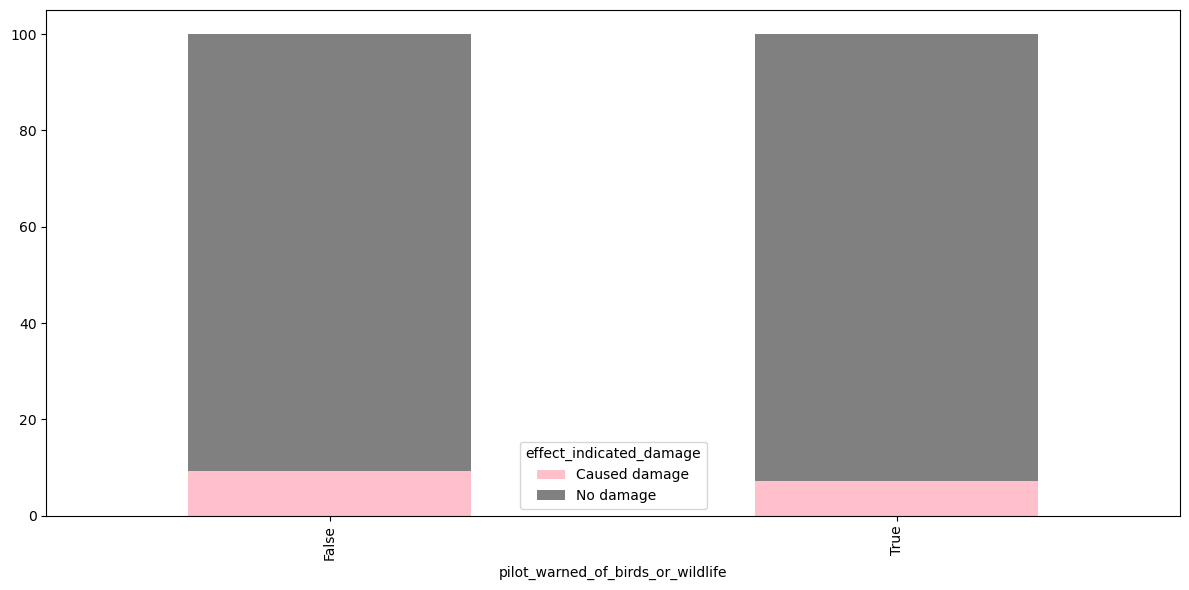

In [87]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data,x='pilot_warned_of_birds_or_wildlife',palette='Pastel2')
crosstab.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(12, 6)
)
plt.tight_layout()
plt.show()

**cost_total**

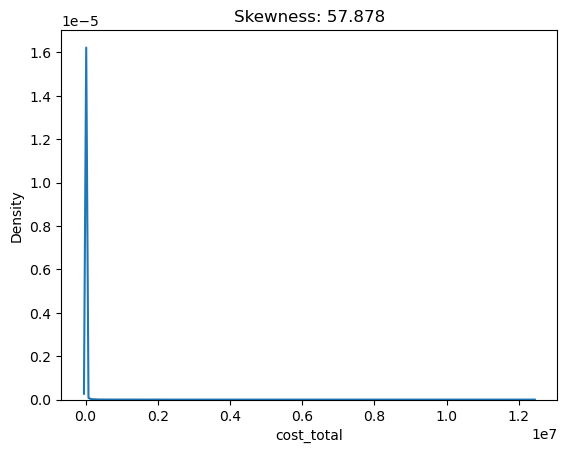

In [88]:
sns.kdeplot(data,x = 'cost_total')
plt.title(f"Skewness: {round(data['cost_total'].skew(),3)}")
plt.show()

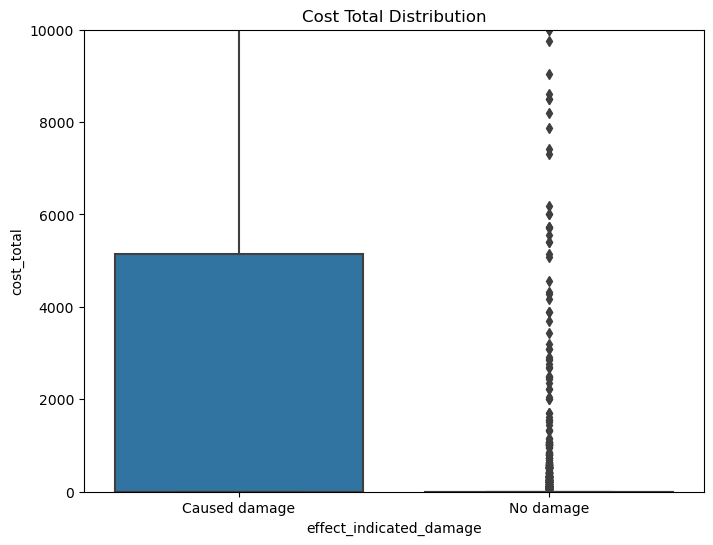

In [89]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='effect_indicated_damage', y='cost_total')
plt.ylim(0, 10000)  
plt.title('Cost Total Distribution')
plt.show()

**feet_above_ground**

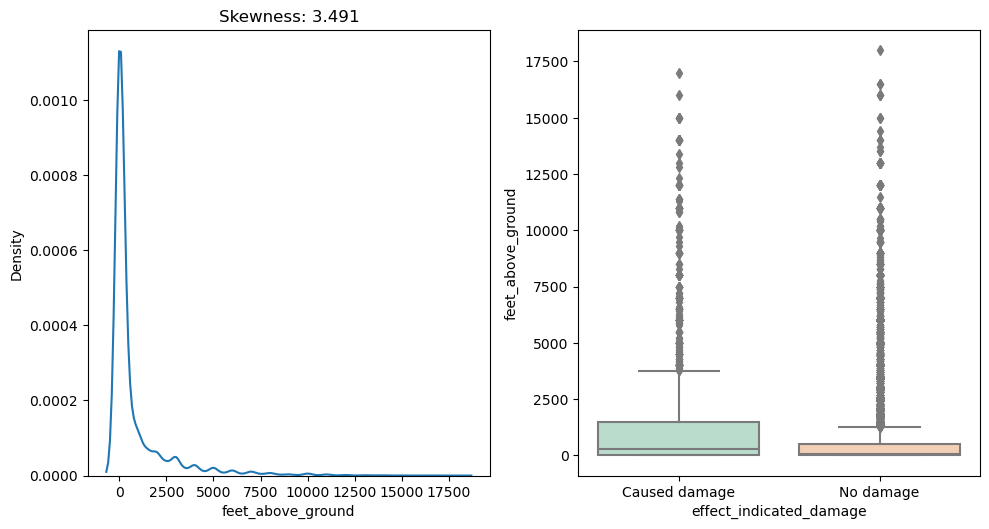

In [90]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(data,x='feet_above_ground')
plt.title(f"Skewness: {round(data['feet_above_ground'].skew(),3)}")
plt.subplot(2,2,2)
p2=sns.boxplot(data, y = 'feet_above_ground', x = 'effect_indicated_damage',palette='Pastel2')
plt.tight_layout()
plt.show()

as we can see, lower the feet above ground. There is more damage 

**number_of_people_injured**

In [91]:
crosstab = pd.crosstab(filtered_data['number_of_people_injured'],data['effect_indicated_damage'],normalize='index') * 100

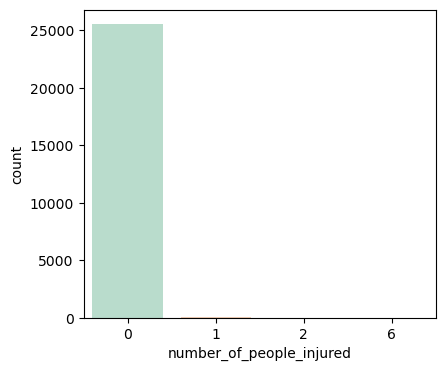

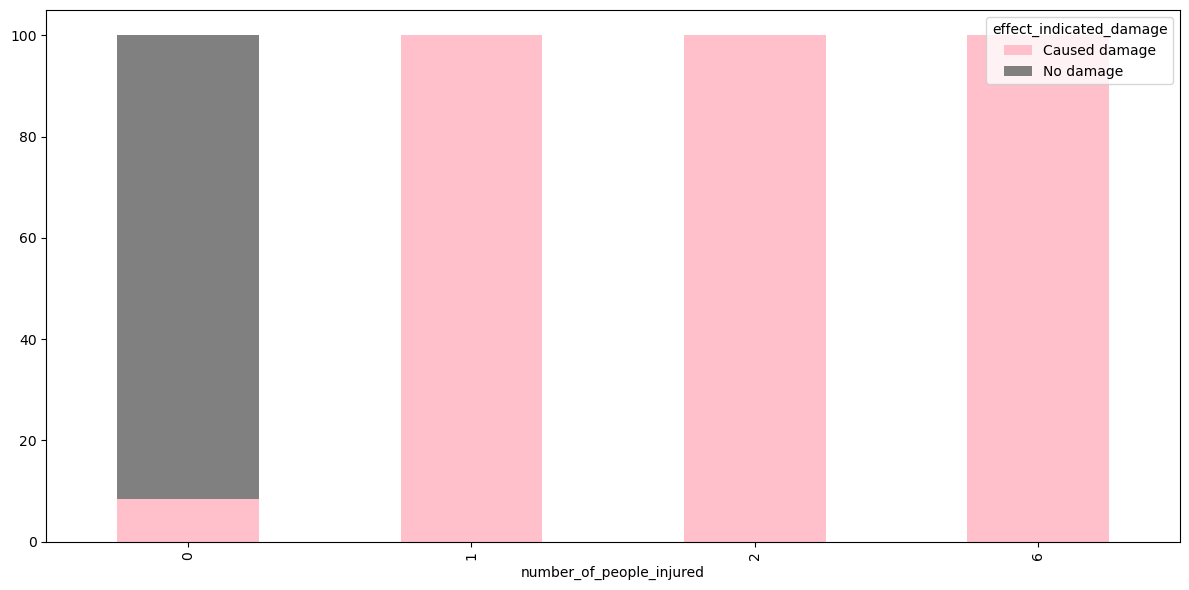

In [92]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data, x ='number_of_people_injured',palette='Pastel2')
crosstab.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(12, 6)
)
plt.tight_layout()
plt.show()

**is_aircraft_large**

In [93]:
crosstab = pd.crosstab(filtered_data['is_aircraft_large'],data['effect_indicated_damage'],normalize='index') * 100

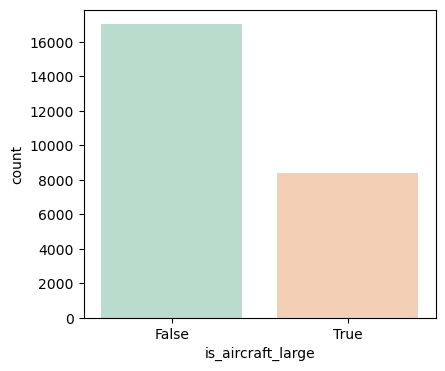

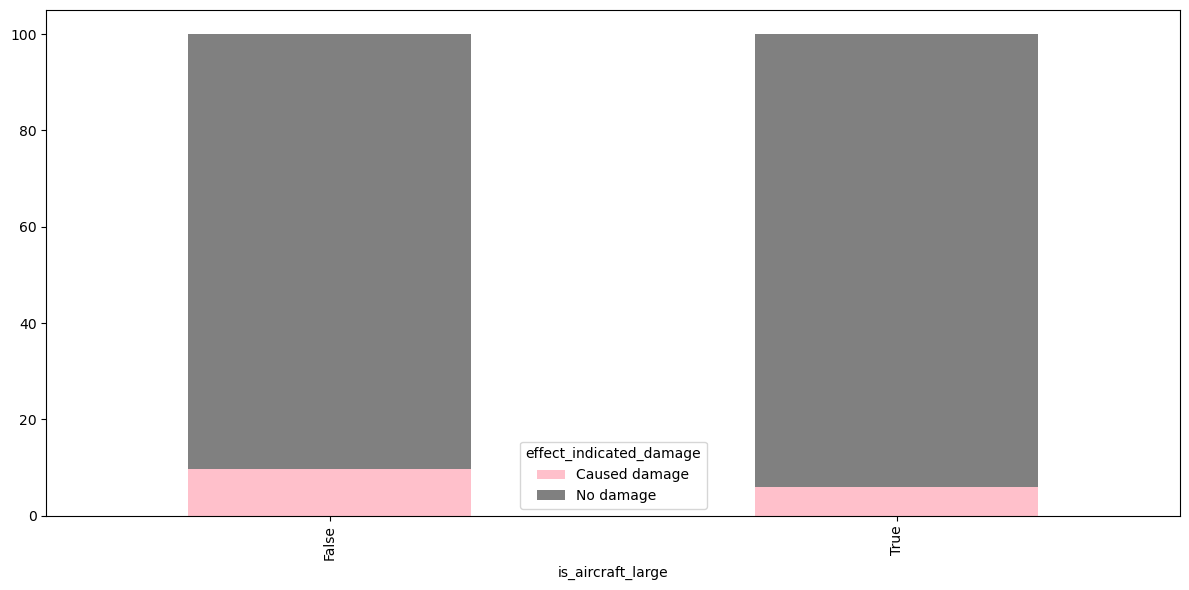

In [94]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data,x='is_aircraft_large',palette='Pastel2')
crosstab.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(12, 6)
)
plt.tight_layout()
plt.show()

In [44]:
data['flightdate'] = pd.to_datetime(data['flightdate'])

In [45]:
data['month'] = data['flightdate'].dt.month
data['year'] = data['flightdate'].dt.year

In [97]:
data.columns

Index(['aircraft_type', 'airport_name', 'altitude_bin', 'aircraft_make_model',
       'wildlife_number_struck', 'wildlife_number_struck_actual',
       'effect_impact_to_flight', 'flightdate', 'effect_indicated_damage',
       'aircraft_number_of_engines', 'aircraft_airline_operator',
       'origin_state', 'when_phase_of_flight', 'conditions_precipitation',
       'remains_of_wildlife_collected',
       'remains_of_wildlife_sent_to_smithsonian', 'remarks', 'wildlife_size',
       'conditions_sky', 'wildlife_species',
       'pilot_warned_of_birds_or_wildlife', 'cost_total', 'feet_above_ground',
       'number_of_people_injured', 'is_aircraft_large', 'month', 'year'],
      dtype='object')

In [98]:
year  = pd.crosstab(data['year'],data['effect_indicated_damage'],normalize='index') * 100

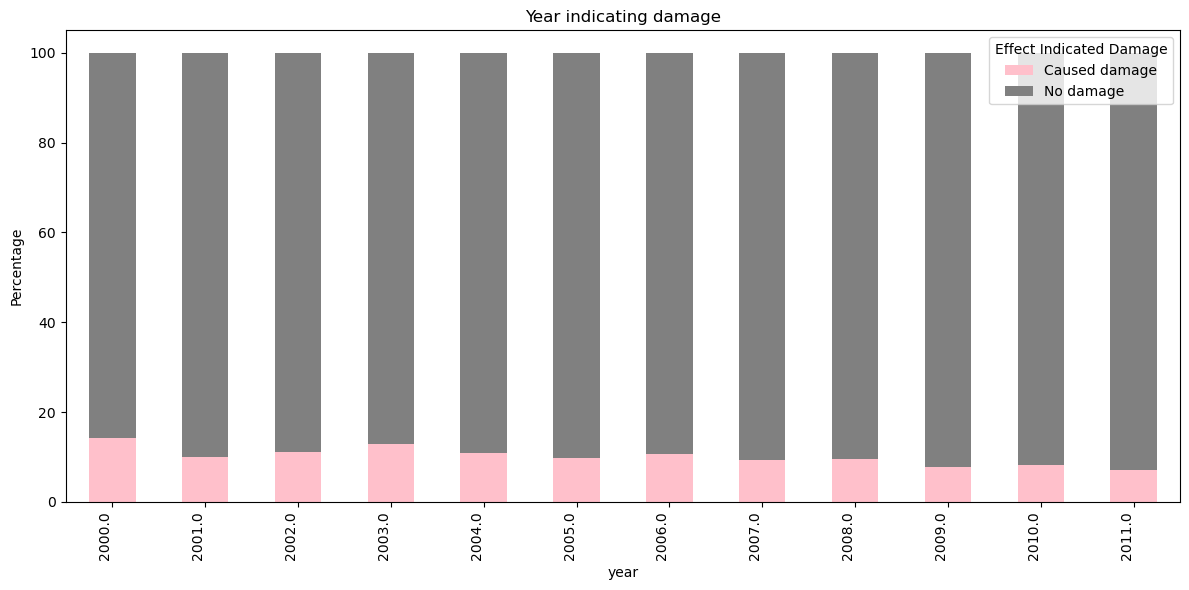

In [99]:
year.plot(
    kind='bar',
    stacked=True,
    color=['pink', 'grey'],
    figsize=(12, 6)
)

plt.ylabel('Percentage')
plt.title('Year indicating damage')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Effect Indicated Damage')
plt.tight_layout()
plt.show()

In [100]:
month = pd.crosstab(data['month'],data['effect_indicated_damage'],normalize='index') * 100

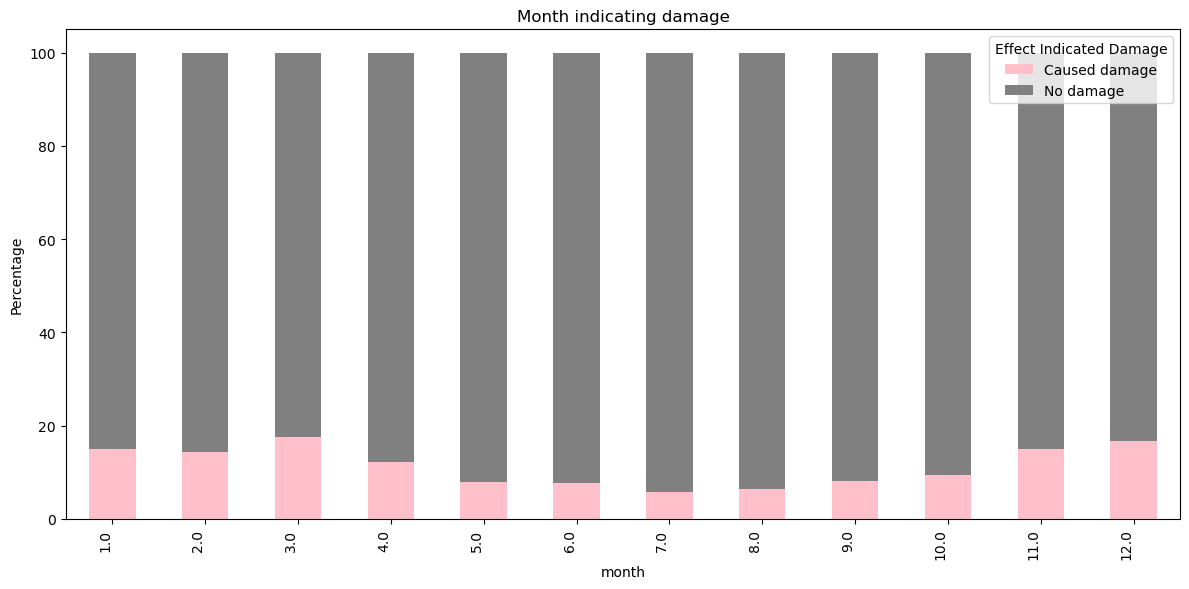

In [101]:
month.plot(
    kind='bar',
    stacked=True,
    color=['Pink','grey'],
    figsize=(12, 6)
)

plt.ylabel('Percentage')
plt.title('Month indicating damage')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Effect Indicated Damage')
plt.tight_layout()
plt.show()

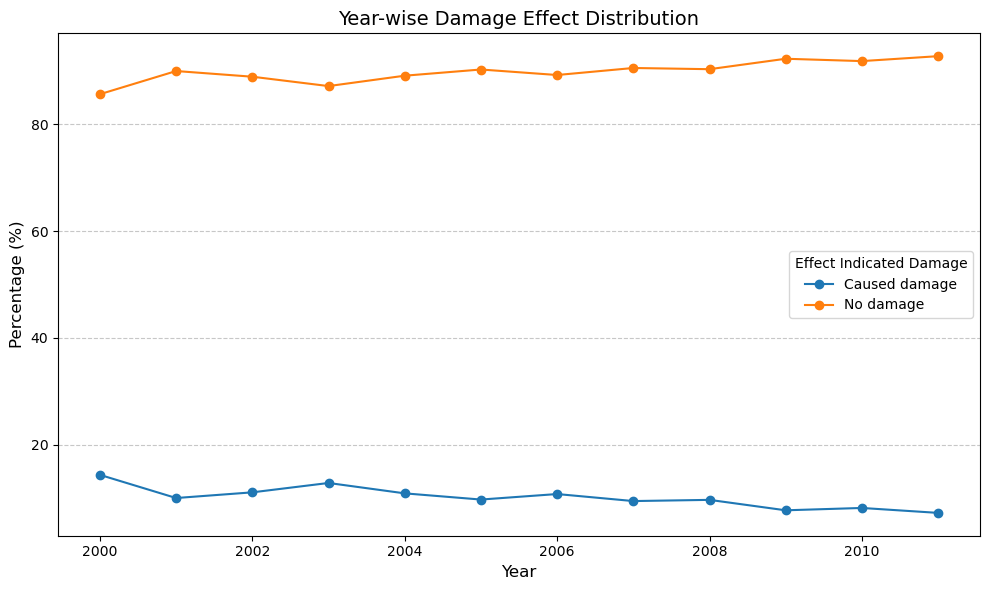

In [102]:
year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Year-wise Damage Effect Distribution", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(title="Effect Indicated Damage")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [17]:
(data.isnull().sum()/ data.shape[0]) * 100

aircraft_type                               0.504734
airport_name                                0.504734
altitude_bin                                0.504734
aircraft_make_model                         0.000000
wildlife_number_struck                      0.504734
wildlife_number_struck_actual               0.000000
effect_impact_to_flight                    91.869473
flightdate                                  0.504734
effect_indicated_damage                     0.000000
aircraft_number_of_engines                  1.044683
aircraft_airline_operator                   0.504734
origin_state                                1.756788
when_phase_of_flight                        0.504734
conditions_precipitation                   92.115972
remains_of_wildlife_collected               0.000000
remains_of_wildlife_sent_to_smithsonian     0.000000
remarks                                    18.667345
wildlife_size                               0.504734
conditions_sky                              0.

- As in effect_impact_to_flight, when_phase_of_flight has above 90% null values so we can directly drop this column.
- For remarks column, will directly drop this column as it is not an imp column to consider
- aircraft_type column contains constant value - aeroplane so we can directly drop this column.
- we can drop wildlife_number_struck also as it contains binned values of wildlife_number_struck_actual

In [18]:
data.drop(columns=['effect_impact_to_flight','conditions_precipitation','remarks','aircraft_type'], inplace=True)

- Mostly it contains 129 rows so we can directly drop this values from the data as it indicates these rows are commonly empty

In [19]:
data['aircraft_number_of_engines']=data['aircraft_number_of_engines'].fillna(data['aircraft_number_of_engines'].mode()[0])
data['origin_state']=data['origin_state'].fillna(data['origin_state'].mode()[0])

In [20]:
data.dropna(inplace=True)

In [21]:
data.shape

(25429, 21)

In [22]:
data.isnull().sum()

airport_name                               0
altitude_bin                               0
aircraft_make_model                        0
wildlife_number_struck                     0
wildlife_number_struck_actual              0
flightdate                                 0
effect_indicated_damage                    0
aircraft_number_of_engines                 0
aircraft_airline_operator                  0
origin_state                               0
when_phase_of_flight                       0
remains_of_wildlife_collected              0
remains_of_wildlife_sent_to_smithsonian    0
wildlife_size                              0
conditions_sky                             0
wildlife_species                           0
pilot_warned_of_birds_or_wildlife          0
cost_total                                 0
feet_above_ground                          0
number_of_people_injured                   0
is_aircraft_large                          0
dtype: int64

## Hypothesis testing

In [24]:
samp1 = data[data['effect_indicated_damage'] == 'No damage'].sample(2000)

In [25]:
samp2 = data[data['effect_indicated_damage'] == 'Caused damage'].sample(2000)

In [94]:
final_samp = pd.concat([samp1,samp2])

In [95]:
final_samp.shape

(4000, 23)

In [96]:
final_samp.head()

,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large,month,year
record_id,,,,,,,,,,,,,,,,,,,,,,,
223570,RONALD REAGAN WASHINGTON NATL,< 1000 ft,B-737-800,1,1,No damage,2,AMERICAN AIRLINES,DC,Climb,Rain,False,False,Small,Some Cloud,Unknown bird - small,False,0,800.0,0,True,7.0,2004.0
214837,LAGUARDIA NY,> 1000 ft,B-757-200,2 to 10,9,No damage,2,AMERICAN AIRLINES,New York,Approach,Rain,False,False,Small,Some Cloud,Unknown bird - small,False,0,1800.0,0,True,5.0,2002.0
228107,HURON REGIONAL ARPT,< 1000 ft,C-560,1,1,No damage,2,BUSINESS,South Dakota,Take-off run,Fog,True,False,Medium,No Cloud,Ring-necked pheasant,False,0,0.0,0,False,4.0,2004.0
227087,NASHVILLE INTL,< 1000 ft,B-737-300,2 to 10,4,No damage,2,SOUTHWEST AIRLINES,Tennessee,Landing Roll,Rain,False,False,Small,Overcast,Unknown bird - small,True,0,0.0,0,True,6.0,2004.0
200986,HARRISBURG INTL,< 1000 ft,FOKKER F100,1,1,No damage,2,AMERICAN AIRLINES,Pennsylvania,Climb,Fog,False,False,Small,No Cloud,Unknown bird - small,False,0,300.0,0,False,7.0,2000.0


In [117]:
def chi2test(data,feature):
    contigency = pd.crosstab(data[feature],data['effect_indicated_damage'])
    pval = chi2_contingency(contigency)[1]
    
    if pval < 0.05:
        print('Reject Null Hypothesis')
    else:
        print('We failed to reject Null hypothesis')

In [118]:
from scipy.stats import shapiro

def shapiro_test(data, feature):
    # Split the data into two groups based on the target (damage/no damage)
    group1 = data[data['effect_indicated_damage'] == 'No damage'][feature]
    group2 = data[data['effect_indicated_damage'] == 'Caused damage'][feature]
    
    stat1, p_value1 = shapiro(group1)
    stat2, p_value2 = shapiro(group2)
    
    if (p_value1 < 0.05 and p_value2 < 0.05):
        print("Reject the null hypothesis: Data is not normally distributed for both groups")
    else:
        print("Fail to reject the null hypothesis: Data is normally distributed for at least one group")

In [119]:
from scipy.stats import levene

def levene_test(data, feature):
    group1 = data[data['effect_indicated_damage'] == 'No damage'][feature]
    group2 = data[data['effect_indicated_damage'] == 'Caused damage'][feature]
    
    stat, p_value = levene(group1, group2)
    
    if p_value < 0.05:
        print("Reject the null hypothesis: Variances are not equal (heteroscedasticity)")
    else:
        print("Fail to reject the null hypothesis: Variances are equal")



In [120]:
def ttest_independent(data, feature):

    group1 = data[data['effect_indicated_damage'] == 'No damage'][feature]
    group2 = data[data['effect_indicated_damage'] == 'Caused damage'][feature]

    t_stat, p_value = ttest_ind(group1, group2)  
    print(p_value)
    if p_value < 0.05:
        print('reject null hypothesis')
    else:
        print('We failed to reject null hypothesis')

In [121]:
def mann_whitney_u_test(data, feature):
    group1 = data[data['effect_indicated_damage'] == 'No damage'][feature]
    group2 = data[data['effect_indicated_damage'] == 'Caused damage'][feature]
    
    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    if p_value < 0.05:
        print('reject null hypothesis')
    else:
        print('We failed to reject null hypothesis')

In [122]:
# h0: Bird strikes are not less likely to cause damage if pilots were warned about bird activity.
# H1: Bird strikes are less likely to cause damage if pilots were warned about bird activity.

chi2test(data,'pilot_warned_of_birds_or_wildlife')

Reject Null Hypothesis


In [124]:
#h0 :  The proportion of bird strikes that cause damage is the same across all airports.
#ha: The proportion of bird strikes that cause damage differs across airports.

chi2test(data,'airport_name')

Reject Null Hypothesis


In [125]:
# H0: The altitude bin (< 1000 ft or > 1000 ft) has no association with whether a bird strike causes damage or not.
# H1:The altitude bin (< 1000 ft or > 1000 ft) is associated with whether a bird strike causes damage or not. 

chi2test(data,'altitude_bin')

Reject Null Hypothesis


In [126]:
#h0 : The likelihood of bird strikes causing damage does not differ based on the origin state of the flight.
#ha : The likelihood of bird strikes causing damage differs based on the origin state of the flight.

chi2test(data,'origin_state')

Reject Null Hypothesis


In [127]:
# H0: There is no significant association between wildlife size and the likelihood of damage.
# H1 : The wildlife species does influence the likelihood of damage.

chi2test(data,'wildlife_size')

Reject Null Hypothesis


In [ ]:
# Null Hypothesis (H₀): The average damage cost is the same across all bird species.
# Alternative Hypothesis (H₁): At least one bird species has a significantly different average damage cost.


In [23]:
from scipy.stats import f_oneway,kruskal

pval = f_oneway(data[data['wildlife_size'] == 'Small']['cost_total'],
              data[data['wildlife_size'] == 'Medium']['cost_total'],
              data[data['wildlife_size'] == 'Small']['cost_total'])[1]

In [24]:
if pval < 0.05:
    print('reject')
else:
    print('failed to reject')

reject


In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(data['cost_total'], data['wildlife_size'])
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
 Large Medium -33102.4032    0.0  -40377.097 -25827.7094   True
 Large  Small -37871.4747    0.0 -44495.1063 -31247.8431   True
Medium  Small  -4769.0715 0.0249  -9059.9899   -478.1531   True
---------------------------------------------------------------


In [129]:
shapiro_test(data,'wildlife_number_struck_actual')

Reject the null hypothesis: Data is not normally distributed for both groups


In [130]:
levene_test(data,'wildlife_number_struck_actual')

Reject the null hypothesis: Variances are not equal (heteroscedasticity)


In [131]:
mann_whitney_u_test(data,'wildlife_number_struck_actual')

reject null hypothesis


In [132]:
#H0: Larger aircraft are not less likely to sustain damage than smaller aircraft.
#H1: Larger aircraft are less likely to sustain damage than smaller aircraft.

chi2test(data,'is_aircraft_large')

Reject Null Hypothesis


In [133]:
# H0: Aircraft with more engines are not less likely to sustain damage than aircraft with fewer engines.
# H1: Aircraft with more engines are less likely to sustain damage than aircraft with fewer engines.
chi2test(data,'aircraft_number_of_engines')

Reject Null Hypothesis


In [134]:
#H0: Bird strikes during the approach phase are not more likely to cause damage than during other phases.
#Ha: Bird strikes during the approach phase are more likely to cause damage than during other phases.
chi2test(data,'when_phase_of_flight')

Reject Null Hypothesis


In [135]:
chi2test(data,'aircraft_make_model')

Reject Null Hypothesis


In [137]:
shapiro_test(data, 'cost_total')

Reject the null hypothesis: Data is not normally distributed for both groups


In [138]:
levene_test(data,'cost_total')

Reject the null hypothesis: Variances are not equal (heteroscedasticity)


In [139]:
#h0: Cost is same in both damage and not damage cases
#ha: Cost is not same
mann_whitney_u_test(data,'cost_total')

reject null hypothesis


In [140]:
#h0: There is no significant association between feet above ground and likelihood of damage
#ha : there is significant association between feet above and likelihood of damage

shapiro_test(data,'feet_above_ground')

Reject the null hypothesis: Data is not normally distributed for both groups


In [141]:
levene_test(data,'feet_above_ground')

Reject the null hypothesis: Variances are not equal (heteroscedasticity)


In [142]:
mann_whitney_u_test(data,'feet_above_ground')

reject null hypothesis


In [145]:
data['number_of_people_injured_map'] = data['number_of_people_injured'].map({0:'Not Injured',1:'Injured',2:'Injured',6:'Injured'})

In [146]:
# There is no relationship between no of people injured and likelihood of damage
# There is relationship Between no of people injured and likelihood of damage
chi2test(data,'number_of_people_injured_map')

Reject Null Hypothesis


# Splitting into train test

In [16]:
x = data.drop(columns=['effect_indicated_damage','flightdate'])
y = data['effect_indicated_damage']

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.2,random_state=42,stratify=y)
print(xtrain.shape, ytrain.shape, xtest.shape,ytest.shape)

(20343, 19) (20343,) (5086, 19) (5086,)


In [18]:
xtrain.head(3)

,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
record_id,,,,,,,,,,,,,,,,,,,
244214,SALT LAKE CITY INTL,< 1000 ft,CL-RJ100/200,1,1,2,SKYWEST AIRLINES,Utah,Approach,True,True,Medium,Some Cloud,Lesser scaup,True,0,500.0,0,False
218056,GREATER BINGHAMTON ARPT,< 1000 ft,DHC8 DASH 8,1,1,2,ALLEGHENYAIRLINES,New York,Take-off run,False,False,Small,Some Cloud,Killdeer,True,0,0.0,0,False
223742,LUBBOCK INTL,< 1000 ft,EMB-145,1,1,2,AMERICAN EAGLE AIRLINES,Texas,Take-off run,False,False,Small,No Cloud,Unknown bird - small,False,0,0.0,0,False


In [19]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [20]:
def encode_features(X_train, X_test, y_train, y_test):
    """
    Encodes categorical features using Label, Frequency, and Ordinal Encoding.
    Ensures transformations are learned from training data and applied to test data.
    Returns encoded copies without modifying the original datasets.
    """
    # Make copies to preserve original data
    X_train_enc = X_train.copy()
    X_test_enc = X_test.copy()
    y_train_enc = y_train.copy()
    y_test_enc = y_test.copy()
    
    # Label Encoding
    label_cols = ['remains_of_wildlife_collected', 'remains_of_wildlife_sent_to_smithsonian',
                  'pilot_warned_of_birds_or_wildlife', 'is_aircraft_large',
                  'when_phase_of_flight', 'conditions_sky']
    
    label_encoders = {}
    for col in label_cols:
        le = LabelEncoder()
        X_train_enc[col] = le.fit_transform(X_train[col])
        X_test_enc[col] = le.transform(X_test[col])
        label_encoders[col] = le
    
    # Frequency Encoding
    freq_cols = ['airport_name', 'aircraft_make_model', 'aircraft_airline_operator',
                 'origin_state', 'wildlife_species']
    
    for col in freq_cols:
        freq_map = X_train[col].value_counts(normalize=True).to_dict()
        X_train_enc[col] = X_train[col].map(freq_map)
        X_test_enc[col] = X_test[col].map(freq_map).fillna(0)  # Fill missing with 0
    
    # Ordinal Encoding
    ordinal_mappings = {
        'altitude_bin': [['< 1000 ft', '> 1000 ft']],
        'wildlife_number_struck': [['1', '2 to 10', '11 to 100', 'Over 100']],
        'aircraft_number_of_engines': [['1', '2', '3', '4', 'C']],
        'wildlife_size': [['Small', 'Medium', 'Large']]
    }
    
    for col, categories in ordinal_mappings.items():
        oe = OrdinalEncoder(categories=categories)
        X_train_enc[col] = oe.fit_transform(X_train[[col]])
        X_test_enc[col] = oe.transform(X_test[[col]])
    
    # Encode Target Variable
    target_mapping = {'No damage': 0, 'Caused damage': 1}
    y_train_enc = y_train.map(target_mapping)
    y_test_enc = y_test.map(target_mapping)
    
    return X_train_enc, X_test_enc, y_train_enc, y_test_enc

In [21]:
xtrain,xtest,ytrain,ytest = encode_features(xtrain,xtest,ytrain,ytest)

In [22]:
xtrain.head()

,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
record_id,,,,,,,,,,,,,,,,,,,
244214,0.018729,0.0,0.076980,0.0,1,1.0,0.035393,0.019466,0,1,1,1.0,2,0.000295,1,0,500.0,0,0
218056,0.000590,0.0,0.022170,0.0,1,1.0,0.001278,0.051664,5,0,0,0.0,2,0.018827,1,0,0.0,0,0
223742,0.001327,0.0,0.038146,0.0,1,1.0,0.037114,0.095364,5,0,0,0.0,0,0.410608,0,0,0.0,0,0
309542,0.001966,0.0,0.012928,1.0,8,1.0,0.080273,0.013911,5,1,0,0.0,2,0.410608,0,0,0.0,0,0
307437,0.005948,0.0,0.007226,0.0,1,1.0,0.180111,0.116305,5,1,0,0.0,1,0.017156,1,0,0.0,0,1


In [23]:
ytrain.value_counts()

effect_indicated_damage
0    18380
1     1963
Name: count, dtype: int64

In [24]:
numcols=['wildlife_number_struck_actual', 'cost_total', 'feet_above_ground']

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
xtrain[numcols]= scaler.fit_transform(xtrain[numcols])
xtest[numcols]= scaler.transform(xtest[numcols])

In [26]:
xtrain.head()

,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
record_id,,,,,,,,,,,,,,,,,,,
244214,0.018729,0.0,0.076980,0.0,0.000000,1.0,0.035393,0.019466,0,1,1,1.0,2,0.000295,1,0.0,0.027778,0,0
218056,0.000590,0.0,0.022170,0.0,0.000000,1.0,0.001278,0.051664,5,0,0,0.0,2,0.018827,1,0.0,0.000000,0,0
223742,0.001327,0.0,0.038146,0.0,0.000000,1.0,0.037114,0.095364,5,0,0,0.0,0,0.410608,0,0.0,0.000000,0,0
309542,0.001966,0.0,0.012928,1.0,0.007439,1.0,0.080273,0.013911,5,1,0,0.0,2,0.410608,0,0.0,0.000000,0,0
307437,0.005948,0.0,0.007226,0.0,0.000000,1.0,0.180111,0.116305,5,1,0,0.0,1,0.017156,1,0.0,0.000000,0,1


In [117]:
from sklearn.preprocessing import PowerTransformer

In [118]:
pt = PowerTransformer()
xtrain[numcols] = pt.fit_transform(xtrain[numcols])
xtest[numcols]= pt.transform(xtest[numcols])

## Model Selection

In [27]:
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier
from sklearn.metrics import classification_report,cohen_kappa_score,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix,roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [28]:
smote = SMOTE()
xtrain_s, ytrain_s = smote.fit_resample(xtrain,ytrain)
print(xtrain_s.shape)
print(ytrain_s.shape)

(36760, 19)
(36760,)


In [29]:
m=[]  # model
accu=[]  # accuracy
rec=[]  # recall
pre=[]  # precision
f1=[]  # f1 score
kap=[]  # cohen-kappa

def model_validation(model, xtrain, ytrain, xtest, ytest):
    mod = model
    mod.fit(xtrain, ytrain)
    pred_s = mod.predict_proba(xtest)[:, 1]
    pred_h = mod.predict(xtest)

    print('confusion_matrix :', '\n', confusion_matrix(ytest, pred_h))
    print('classification_report :', '\n', classification_report(ytest, pred_h))

    fpr, tpr, thres = roc_curve(ytest, pred_s)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='red', ls='--')
    plt.title(f'ROC AUC : {round(roc_auc_score(ytest, pred_s), 4)}')
    plt.show()

    response = input('Do you want to save this model? Y/N : ')
    if response.lower() == 'y':
        global score_card
        m.append(str(model))
        accu.append(accuracy_score(ytest, pred_h))
        rec.append(recall_score(ytest, pred_h))
        pre.append(precision_score(ytest, pred_h))
        f1.append(f1_score(ytest, pred_h))
        kap.append(cohen_kappa_score(ytest, pred_h))

        score_card = pd.DataFrame({'Model': m, 'Accuracy': accu, 'Recall': rec, 'Precision': pre, 'F1-score': f1, 'Cohen-Kappa': kap})
        return score_card
    else:
        return None


confusion_matrix : 
 [[4529   66]
 [ 385  106]]
classification_report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      4595
           1       0.62      0.22      0.32       491

    accuracy                           0.91      5086
   macro avg       0.77      0.60      0.64      5086
weighted avg       0.89      0.91      0.89      5086



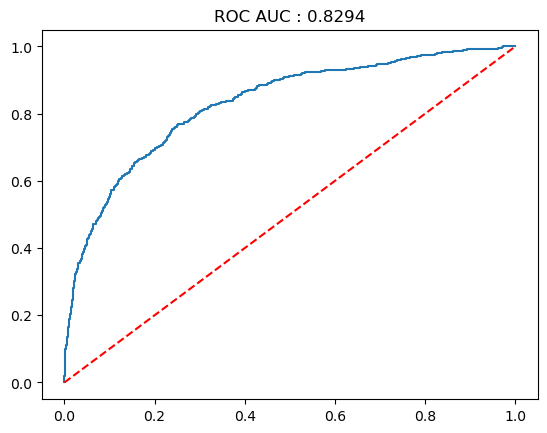

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889


In [30]:
model_validation(LogisticRegression(),xtrain,ytrain,xtest,ytest)

confusion_matrix : 
 [[4341  254]
 [ 258  233]]
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4595
           1       0.48      0.47      0.48       491

    accuracy                           0.90      5086
   macro avg       0.71      0.71      0.71      5086
weighted avg       0.90      0.90      0.90      5086



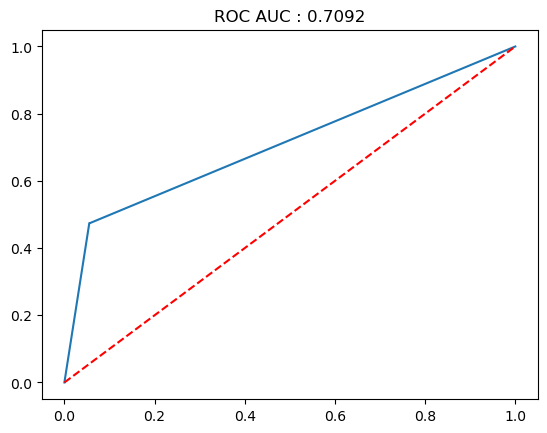

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795


In [31]:
model_validation(DecisionTreeClassifier(),xtrain,ytrain,xtest,ytest)

confusion_matrix : 
 [[3861  734]
 [ 131  360]]
classification_report : 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      4595
           1       0.33      0.73      0.45       491

    accuracy                           0.83      5086
   macro avg       0.65      0.79      0.68      5086
weighted avg       0.91      0.83      0.86      5086



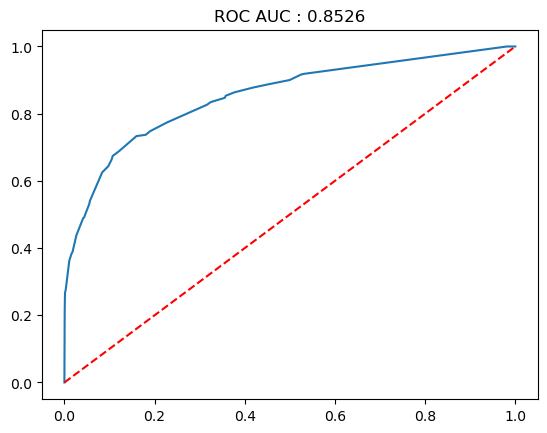

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347


In [32]:
model_validation(DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=3,min_samples_split=2,class_weight='balanced'),xtrain,ytrain,xtest,ytest)

confusion_matrix : 
 [[4548   47]
 [ 302  189]]
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      4595
           1       0.80      0.38      0.52       491

    accuracy                           0.93      5086
   macro avg       0.87      0.69      0.74      5086
weighted avg       0.92      0.93      0.92      5086



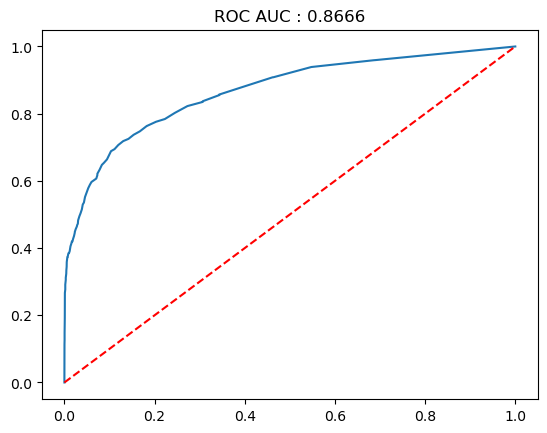

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844


In [33]:
model_validation(RandomForestClassifier(),xtrain,ytrain,xtest,ytest)

confusion_matrix : 
 [[4494  101]
 [ 352  139]]
classification_report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      4595
           1       0.58      0.28      0.38       491

    accuracy                           0.91      5086
   macro avg       0.75      0.63      0.67      5086
weighted avg       0.89      0.91      0.90      5086



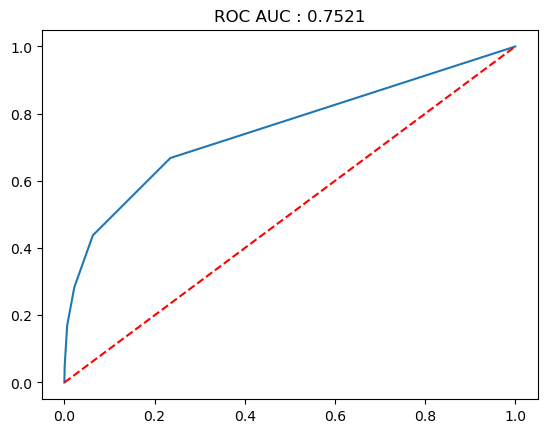

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359


In [34]:
model_validation(KNeighborsClassifier(n_neighbors=5,metric='euclidean'),xtrain,ytrain,xtest,ytest)

confusion_matrix : 
 [[4565   30]
 [ 372  119]]
classification_report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      4595
           1       0.80      0.24      0.37       491

    accuracy                           0.92      5086
   macro avg       0.86      0.62      0.66      5086
weighted avg       0.91      0.92      0.90      5086



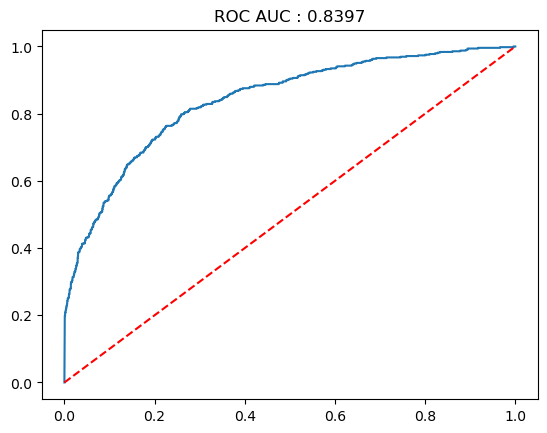

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311


In [35]:
model_validation(GaussianNB(),xtrain,ytrain,xtest,ytest)

confusion_matrix : 
 [[4552   43]
 [ 302  189]]
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      4595
           1       0.81      0.38      0.52       491

    accuracy                           0.93      5086
   macro avg       0.88      0.69      0.74      5086
weighted avg       0.93      0.93      0.92      5086



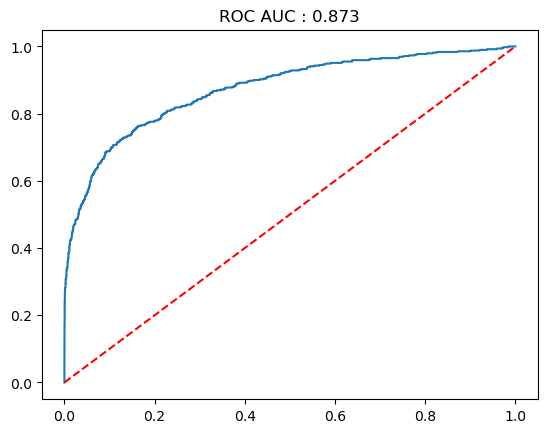

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.930790,0.348269,0.842365,0.492795,0.462435
1,DecisionTreeClassifier(),0.896579,0.470468,0.464789,0.467611,0.410340
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931773,0.397149,0.792683,0.529172,0.496739
4,KNeighborsClassifier(metric='euclidean'),0.926268,0.384929,0.721374,0.501992,0.466126
5,GaussianNB(),0.927055,0.279022,0.889610,0.424806,0.397009
6,GradientBoostingClassifier(),0.932167,0.384929,0.814655,0.522822,0.491305


In [38]:
model_validation(GradientBoostingClassifier(),xtrain,ytrain,xtest,ytest)

confusion_matrix : 
 [[4558   37]
 [ 313  178]]
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      4595
           1       0.83      0.36      0.50       491

    accuracy                           0.93      5086
   macro avg       0.88      0.68      0.73      5086
weighted avg       0.93      0.93      0.92      5086



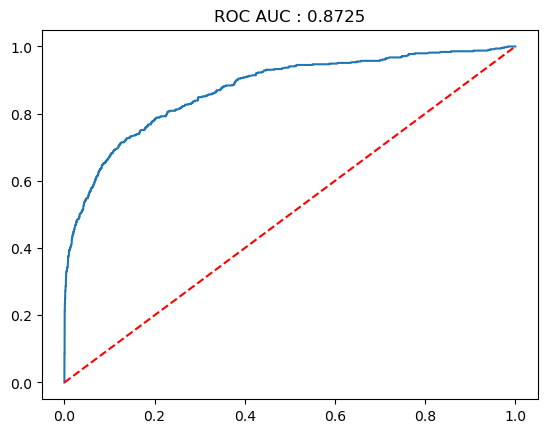

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279


In [36]:
model_validation(AdaBoostClassifier(),xtrain,ytrain,xtest,ytest)

confusion_matrix : 
 [[4527   68]
 [ 274  217]]
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      4595
           1       0.76      0.44      0.56       491

    accuracy                           0.93      5086
   macro avg       0.85      0.71      0.76      5086
weighted avg       0.93      0.93      0.92      5086



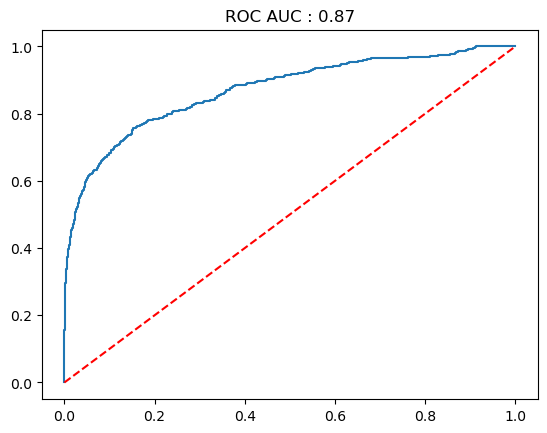

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279
7,"XGBClassifier(base_score=None, booster=None, c...",0.932757,0.441955,0.761404,0.559278,0.525641


In [37]:
model_validation(XGBClassifier(),xtrain,ytrain,xtest,ytest)

confusion_matrix : 
 [[4511   84]
 [ 302  189]]
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      4595
           1       0.69      0.38      0.49       491

    accuracy                           0.92      5086
   macro avg       0.81      0.68      0.73      5086
weighted avg       0.91      0.92      0.91      5086



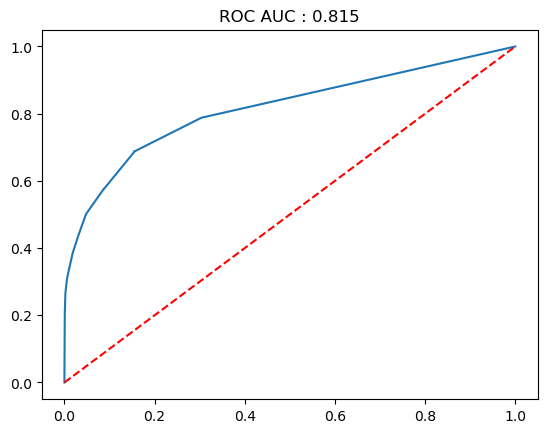

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279
7,"XGBClassifier(base_score=None, booster=None, c...",0.932757,0.441955,0.761404,0.559278,0.525641
8,BaggingClassifier(),0.924105,0.384929,0.692308,0.494764,0.457324


In [38]:
model_validation(BaggingClassifier(), xtrain, ytrain, xtest, ytest)

In [39]:
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=8)),
        ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05)),
        ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.05)),
        ('bagging', BaggingClassifier(n_estimators=100))
    ],
    final_estimator=LogisticRegression(),  # Meta-learner
    passthrough=True
)

confusion_matrix : 
 [[4538   57]
 [ 286  205]]
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      4595
           1       0.78      0.42      0.54       491

    accuracy                           0.93      5086
   macro avg       0.86      0.70      0.75      5086
weighted avg       0.93      0.93      0.92      5086



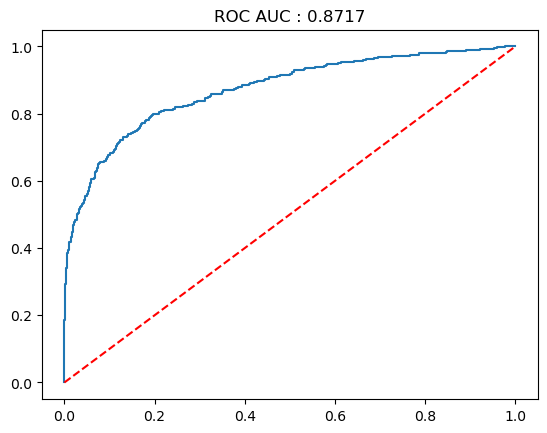

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279
7,"XGBClassifier(base_score=None, booster=None, c...",0.932757,0.441955,0.761404,0.559278,0.525641
8,BaggingClassifier(),0.924105,0.384929,0.692308,0.494764,0.457324
9,"StackingClassifier(estimators=[('rf',\n ...",0.932560,0.417515,0.782443,0.544489,0.511684


In [40]:
model_validation(stacking_clf,xtrain,ytrain,xtest,ytest)

In [41]:
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.05)),
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=8)),
        ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05))
    ],
    voting='soft'  # Use 'soft' for probability-based voting
)

confusion_matrix : 
 [[4564   31]
 [ 311  180]]
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      4595
           1       0.85      0.37      0.51       491

    accuracy                           0.93      5086
   macro avg       0.89      0.68      0.74      5086
weighted avg       0.93      0.93      0.92      5086



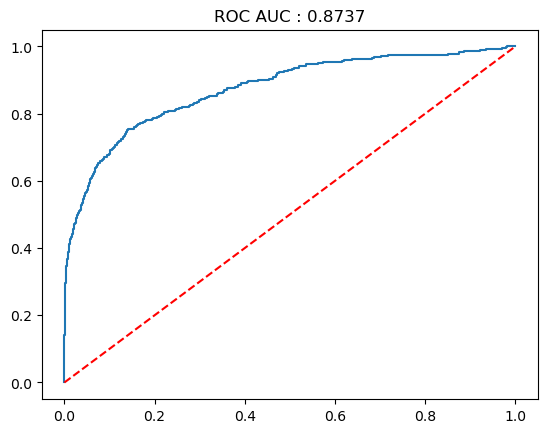

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279
7,"XGBClassifier(base_score=None, booster=None, c...",0.932757,0.441955,0.761404,0.559278,0.525641
8,BaggingClassifier(),0.924105,0.384929,0.692308,0.494764,0.457324
9,"StackingClassifier(estimators=[('rf',\n ...",0.932560,0.417515,0.782443,0.544489,0.511684


In [42]:
model_validation(voting_clf,xtrain,ytrain,xtest,ytest)

In [43]:
voting_clf = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(class_weight='balanced')),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.05)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=8, class_weight={0:1, 1:2}))
], voting='soft')

confusion_matrix : 
 [[4487  108]
 [ 278  213]]
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      4595
           1       0.66      0.43      0.52       491

    accuracy                           0.92      5086
   macro avg       0.80      0.71      0.74      5086
weighted avg       0.91      0.92      0.92      5086



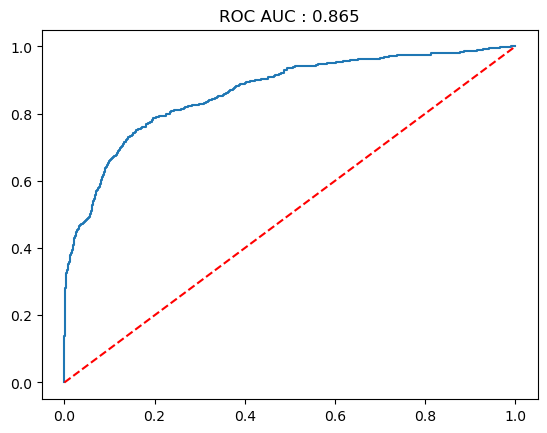

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279
7,"XGBClassifier(base_score=None, booster=None, c...",0.932757,0.441955,0.761404,0.559278,0.525641
8,BaggingClassifier(),0.924105,0.384929,0.692308,0.494764,0.457324
9,"StackingClassifier(estimators=[('rf',\n ...",0.932560,0.417515,0.782443,0.544489,0.511684


In [44]:
model_validation(voting_clf,xtrain,ytrain,xtest,ytest)

In [45]:
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=8)),
        ('xgb', XGBClassifier(n_estimators=300, max_depth = 5,learning_rate=0.05)),
        ('gb', GradientBoostingClassifier(n_estimators=150, learning_rate=0.05))
    ],
    final_estimator=LogisticRegression(),
    passthrough=True
)

confusion_matrix : 
 [[4533   62]
 [ 285  206]]
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      4595
           1       0.77      0.42      0.54       491

    accuracy                           0.93      5086
   macro avg       0.85      0.70      0.75      5086
weighted avg       0.92      0.93      0.92      5086



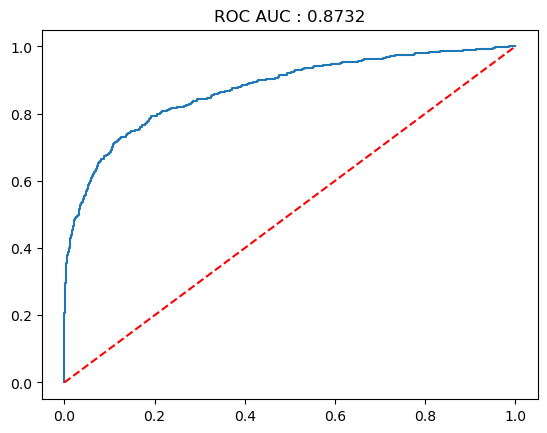

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279
7,"XGBClassifier(base_score=None, booster=None, c...",0.932757,0.441955,0.761404,0.559278,0.525641
8,BaggingClassifier(),0.924105,0.384929,0.692308,0.494764,0.457324
9,"StackingClassifier(estimators=[('rf',\n ...",0.932560,0.417515,0.782443,0.544489,0.511684


In [46]:
model_validation(stacking_clf,xtrain,ytrain,xtest,ytest)

[LightGBM] [Info] Number of positive: 1963, number of negative: 18380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 20343, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096495 -> initscore=-2.236789
[LightGBM] [Info] Start training from score -2.236789
confusion_matrix : 
 [[4549   46]
 [ 285  206]]
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      4595
           1       0.82      0.42      0.55       491

    accuracy                           0.93      5086
   macro avg       0.88      0.70      0.76      5086
weighted avg       0.93      0.93      0.93      5086



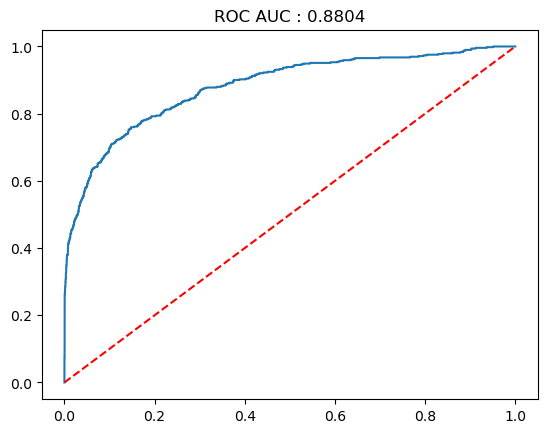

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279
7,"XGBClassifier(base_score=None, booster=None, c...",0.932757,0.441955,0.761404,0.559278,0.525641
8,BaggingClassifier(),0.924105,0.384929,0.692308,0.494764,0.457324
9,"StackingClassifier(estimators=[('rf',\n ...",0.932560,0.417515,0.782443,0.544489,0.511684


In [47]:
from lightgbm import LGBMClassifier
model_validation(LGBMClassifier(),xtrain,ytrain,xtest,ytest)

In [48]:
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=8)),
        ('xgb', XGBClassifier(n_estimators=300, max_depth = 5,learning_rate=0.05)),
        ('gb', GradientBoostingClassifier(n_estimators=150, learning_rate=0.05)),
        ('lgbm', LGBMClassifier(n_estimators=200, learning_rate=0.05))],
    final_estimator=LogisticRegression(class_weight='balanced'),
    passthrough=True
)

[LightGBM] [Info] Number of positive: 1963, number of negative: 18380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 20343, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096495 -> initscore=-2.236789
[LightGBM] [Info] Start training from score -2.236789
[LightGBM] [Info] Number of positive: 1570, number of negative: 14704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 16274, number of used features: 18
[LightGBM] [Info] [bin

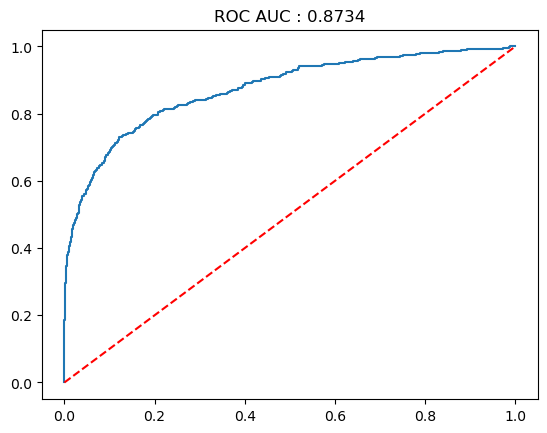

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279
7,"XGBClassifier(base_score=None, booster=None, c...",0.932757,0.441955,0.761404,0.559278,0.525641
8,BaggingClassifier(),0.924105,0.384929,0.692308,0.494764,0.457324
9,"StackingClassifier(estimators=[('rf',\n ...",0.932560,0.417515,0.782443,0.544489,0.511684


In [49]:
model_validation(stacking_clf,xtrain,ytrain,xtest,ytest)

In [50]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=8, class_weight='balanced')),
        ('xgb', XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05, scale_pos_weight=5)),
        ('gb', GradientBoostingClassifier(n_estimators=150, learning_rate=0.05)),
        ('lgbm', LGBMClassifier(n_estimators=200, learning_rate=0.05))
    ],
    voting='soft',
    weights=[1, 2, 1, 1]  # Increase weight of XGBoost slightly
)

[LightGBM] [Info] Number of positive: 1963, number of negative: 18380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 20343, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096495 -> initscore=-2.236789
[LightGBM] [Info] Start training from score -2.236789
confusion_matrix : 
 [[4428  167]
 [ 223  268]]
classification_report : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      4595
           1       0.62      0.55      0.58       491

    accuracy                           0.92      5086
   macro avg       0.78      0.75      0.77      5086
weighted avg       0.92      0.92      0.92      5086



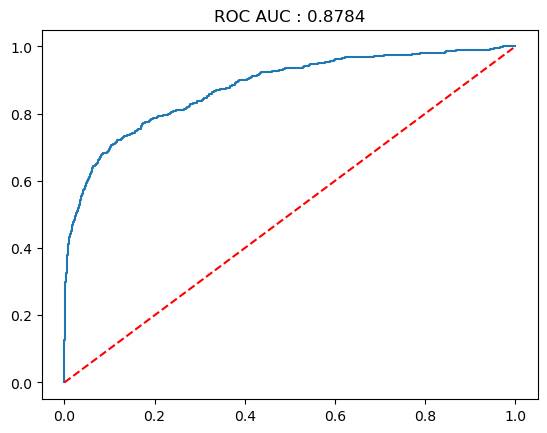

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279
7,"XGBClassifier(base_score=None, booster=None, c...",0.932757,0.441955,0.761404,0.559278,0.525641
8,BaggingClassifier(),0.924105,0.384929,0.692308,0.494764,0.457324
9,"StackingClassifier(estimators=[('rf',\n ...",0.932560,0.417515,0.782443,0.544489,0.511684


In [51]:
model_validation(voting_clf,xtrain,ytrain,xtest,ytest)

In [52]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [8, 10, 12],  
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='recall')
rf_grid.fit(xtrain, ytrain)

# Best parameters
print(rf_grid.best_params_)
rf_best = rf_grid.best_estimator_

{'max_depth': 12, 'n_estimators': 300}


In [53]:
xgb_params = {
    'n_estimators': [200, 300],  
    'max_depth': [4, 5, 6],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'scale_pos_weight': [4, 5, 6]  # Adjusting for class imbalance
}

xgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=5, scoring='recall',verbose=300)
xgb_grid.fit(xtrain, ytrain)

# Best parameters
print(xgb_grid.best_params_)
xgb_best = xgb_grid.best_estimator_


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START learning_rate=0.01, max_depth=4, n_estimators=200, scale_pos_weight=4
[CV 1/5; 1/54] END learning_rate=0.01, max_depth=4, n_estimators=200, scale_pos_weight=4;, score=0.585 total time=   0.2s
[CV 2/5; 1/54] START learning_rate=0.01, max_depth=4, n_estimators=200, scale_pos_weight=4
[CV 2/5; 1/54] END learning_rate=0.01, max_depth=4, n_estimators=200, scale_pos_weight=4;, score=0.567 total time=   0.2s
[CV 3/5; 1/54] START learning_rate=0.01, max_depth=4, n_estimators=200, scale_pos_weight=4
[CV 3/5; 1/54] END learning_rate=0.01, max_depth=4, n_estimators=200, scale_pos_weight=4;, score=0.611 total time=   0.1s
[CV 4/5; 1/54] START learning_rate=0.01, max_depth=4, n_estimators=200, scale_pos_weight=4
[CV 4/5; 1/54] END learning_rate=0.01, max_depth=4, n_estimators=200, scale_pos_weight=4;, score=0.561 total time=   0.1s
[CV 5/5; 1/54] START learning_rate=0.01, max_depth=4, n_estimators=200, scale_pos_weig

[CV 4/5; 8/54] END learning_rate=0.01, max_depth=5, n_estimators=200, scale_pos_weight=5;, score=0.597 total time=   0.2s
[CV 5/5; 8/54] START learning_rate=0.01, max_depth=5, n_estimators=200, scale_pos_weight=5
[CV 5/5; 8/54] END learning_rate=0.01, max_depth=5, n_estimators=200, scale_pos_weight=5;, score=0.643 total time=   0.2s
[CV 1/5; 9/54] START learning_rate=0.01, max_depth=5, n_estimators=200, scale_pos_weight=6
[CV 1/5; 9/54] END learning_rate=0.01, max_depth=5, n_estimators=200, scale_pos_weight=6;, score=0.664 total time=   0.2s
[CV 2/5; 9/54] START learning_rate=0.01, max_depth=5, n_estimators=200, scale_pos_weight=6
[CV 2/5; 9/54] END learning_rate=0.01, max_depth=5, n_estimators=200, scale_pos_weight=6;, score=0.639 total time=   0.3s
[CV 3/5; 9/54] START learning_rate=0.01, max_depth=5, n_estimators=200, scale_pos_weight=6
[CV 3/5; 9/54] END learning_rate=0.01, max_depth=5, n_estimators=200, scale_pos_weight=6;, score=0.705 total time=   0.3s
[CV 4/5; 9/54] START learn

[CV 3/5; 16/54] END learning_rate=0.01, max_depth=6, n_estimators=300, scale_pos_weight=4;, score=0.654 total time=   0.4s
[CV 4/5; 16/54] START learning_rate=0.01, max_depth=6, n_estimators=300, scale_pos_weight=4
[CV 4/5; 16/54] END learning_rate=0.01, max_depth=6, n_estimators=300, scale_pos_weight=4;, score=0.566 total time=   0.3s
[CV 5/5; 16/54] START learning_rate=0.01, max_depth=6, n_estimators=300, scale_pos_weight=4
[CV 5/5; 16/54] END learning_rate=0.01, max_depth=6, n_estimators=300, scale_pos_weight=4;, score=0.620 total time=   0.3s
[CV 1/5; 17/54] START learning_rate=0.01, max_depth=6, n_estimators=300, scale_pos_weight=5
[CV 1/5; 17/54] END learning_rate=0.01, max_depth=6, n_estimators=300, scale_pos_weight=5;, score=0.636 total time=   0.4s
[CV 2/5; 17/54] START learning_rate=0.01, max_depth=6, n_estimators=300, scale_pos_weight=5
[CV 2/5; 17/54] END learning_rate=0.01, max_depth=6, n_estimators=300, scale_pos_weight=5;, score=0.631 total time=   0.4s
[CV 3/5; 17/54] S

[CV 2/5; 24/54] END learning_rate=0.05, max_depth=4, n_estimators=300, scale_pos_weight=6;, score=0.677 total time=   0.2s
[CV 3/5; 24/54] START learning_rate=0.05, max_depth=4, n_estimators=300, scale_pos_weight=6
[CV 3/5; 24/54] END learning_rate=0.05, max_depth=4, n_estimators=300, scale_pos_weight=6;, score=0.690 total time=   0.1s
[CV 4/5; 24/54] START learning_rate=0.05, max_depth=4, n_estimators=300, scale_pos_weight=6
[CV 4/5; 24/54] END learning_rate=0.05, max_depth=4, n_estimators=300, scale_pos_weight=6;, score=0.656 total time=   0.1s
[CV 5/5; 24/54] START learning_rate=0.05, max_depth=4, n_estimators=300, scale_pos_weight=6
[CV 5/5; 24/54] END learning_rate=0.05, max_depth=4, n_estimators=300, scale_pos_weight=6;, score=0.684 total time=   0.1s
[CV 1/5; 25/54] START learning_rate=0.05, max_depth=5, n_estimators=200, scale_pos_weight=4
[CV 1/5; 25/54] END learning_rate=0.05, max_depth=5, n_estimators=200, scale_pos_weight=4;, score=0.623 total time=   0.1s
[CV 2/5; 25/54] S

[CV 1/5; 32/54] END learning_rate=0.05, max_depth=6, n_estimators=200, scale_pos_weight=5;, score=0.654 total time=   0.2s
[CV 2/5; 32/54] START learning_rate=0.05, max_depth=6, n_estimators=200, scale_pos_weight=5
[CV 2/5; 32/54] END learning_rate=0.05, max_depth=6, n_estimators=200, scale_pos_weight=5;, score=0.623 total time=   0.3s
[CV 3/5; 32/54] START learning_rate=0.05, max_depth=6, n_estimators=200, scale_pos_weight=5
[CV 3/5; 32/54] END learning_rate=0.05, max_depth=6, n_estimators=200, scale_pos_weight=5;, score=0.669 total time=   0.2s
[CV 4/5; 32/54] START learning_rate=0.05, max_depth=6, n_estimators=200, scale_pos_weight=5
[CV 4/5; 32/54] END learning_rate=0.05, max_depth=6, n_estimators=200, scale_pos_weight=5;, score=0.594 total time=   0.3s
[CV 5/5; 32/54] START learning_rate=0.05, max_depth=6, n_estimators=200, scale_pos_weight=5
[CV 5/5; 32/54] END learning_rate=0.05, max_depth=6, n_estimators=200, scale_pos_weight=5;, score=0.658 total time=   0.2s
[CV 1/5; 33/54] S

[CV 5/5; 39/54] END learning_rate=0.1, max_depth=4, n_estimators=200, scale_pos_weight=6;, score=0.679 total time=   0.1s
[CV 1/5; 40/54] START learning_rate=0.1, max_depth=4, n_estimators=300, scale_pos_weight=4
[CV 1/5; 40/54] END learning_rate=0.1, max_depth=4, n_estimators=300, scale_pos_weight=4;, score=0.628 total time=   0.2s
[CV 2/5; 40/54] START learning_rate=0.1, max_depth=4, n_estimators=300, scale_pos_weight=4
[CV 2/5; 40/54] END learning_rate=0.1, max_depth=4, n_estimators=300, scale_pos_weight=4;, score=0.603 total time=   0.1s
[CV 3/5; 40/54] START learning_rate=0.1, max_depth=4, n_estimators=300, scale_pos_weight=4
[CV 3/5; 40/54] END learning_rate=0.1, max_depth=4, n_estimators=300, scale_pos_weight=4;, score=0.636 total time=   0.1s
[CV 4/5; 40/54] START learning_rate=0.1, max_depth=4, n_estimators=300, scale_pos_weight=4
[CV 4/5; 40/54] END learning_rate=0.1, max_depth=4, n_estimators=300, scale_pos_weight=4;, score=0.571 total time=   0.1s
[CV 5/5; 40/54] START lear

[CV 4/5; 47/54] END learning_rate=0.1, max_depth=5, n_estimators=300, scale_pos_weight=5;, score=0.577 total time=   0.3s
[CV 5/5; 47/54] START learning_rate=0.1, max_depth=5, n_estimators=300, scale_pos_weight=5
[CV 5/5; 47/54] END learning_rate=0.1, max_depth=5, n_estimators=300, scale_pos_weight=5;, score=0.628 total time=   0.3s
[CV 1/5; 48/54] START learning_rate=0.1, max_depth=5, n_estimators=300, scale_pos_weight=6
[CV 1/5; 48/54] END learning_rate=0.1, max_depth=5, n_estimators=300, scale_pos_weight=6;, score=0.646 total time=   0.2s
[CV 2/5; 48/54] START learning_rate=0.1, max_depth=5, n_estimators=300, scale_pos_weight=6
[CV 2/5; 48/54] END learning_rate=0.1, max_depth=5, n_estimators=300, scale_pos_weight=6;, score=0.603 total time=   0.1s
[CV 3/5; 48/54] START learning_rate=0.1, max_depth=5, n_estimators=300, scale_pos_weight=6
[CV 3/5; 48/54] END learning_rate=0.1, max_depth=5, n_estimators=300, scale_pos_weight=6;, score=0.639 total time=   0.1s
[CV 4/5; 48/54] START lear

In [54]:
gb_params = {
    'n_estimators': [100, 150, 200],  
    'learning_rate': [0.01, 0.05, 0.1]
}

gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5, scoring='recall',verbose=3)
gb_grid.fit(xtrain, ytrain)
print(gb_grid.best_params_)
gb_best = gb_grid.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.303 total time=   2.1s
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=0.288 total time=   1.8s
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=0.277 total time=   1.7s
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=0.273 total time=   1.8s
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=0.291 total time=   1.7s
[CV 1/5] END learning_rate=0.01, n_estimators=150;, score=0.318 total time=   2.5s
[CV 2/5] END learning_rate=0.01, n_estimators=150;, score=0.344 total time=   2.5s
[CV 3/5] END learning_rate=0.01, n_estimators=150;, score=0.318 total time=   2.6s
[CV 4/5] END learning_rate=0.01, n_estimators=150;, score=0.304 total time=   2.5s
[CV 5/5] END learning_rate=0.01, n_estimators=150;, score=0.329 total time=   2.6s
[CV 1/5] END learning_rate=0.01, n_estimators=200;, score=0.333 total time=   3.3s
[CV 2/5] END learning_rate=

In [55]:
lgbm_params = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1]
}

lgbm_grid = GridSearchCV(LGBMClassifier(), lgbm_params, cv=5, scoring='recall',verbose=3)
lgbm_grid.fit(xtrain, ytrain)
print(lgbm_grid.best_params_)
lgbm_best = lgbm_grid.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 1570, number of negative: 14704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 16274, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096473 -> initscore=-2.237044
[LightGBM] [Info] Start training from score -2.237044
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.316 total time=   0.6s
[LightGBM] [Info] Number of positive: 1570, number of negative: 14704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Ligh

[CV 3/5] END learning_rate=0.01, n_estimators=300;, score=0.394 total time=   0.2s
[LightGBM] [Info] Number of positive: 1571, number of negative: 14704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 16275, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096528 -> initscore=-2.236407
[LightGBM] [Info] Start training from score -2.236407
[CV 4/5] END learning_rate=0.01, n_estimators=300;, score=0.360 total time=   0.2s
[LightGBM] [Info] Number of positive: 1571, number of negative: 14704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

[CV 1/5] END learning_rate=0.05, n_estimators=300;, score=0.448 total time=   0.2s
[LightGBM] [Info] Number of positive: 1570, number of negative: 14704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 16274, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096473 -> initscore=-2.237044
[LightGBM] [Info] Start training from score -2.237044
[CV 2/5] END learning_rate=0.05, n_estimators=300;, score=0.397 total time=   0.2s
[LightGBM] [Info] Number of positive: 1570, number of negative: 14704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

[LightGBM] [Info] Number of positive: 1571, number of negative: 14704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 16275, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096528 -> initscore=-2.236407
[LightGBM] [Info] Start training from score -2.236407
[CV 5/5] END learning_rate=0.1, n_estimators=200;, score=0.457 total time=   0.1s
[LightGBM] [Info] Number of positive: 1570, number of negative: 14704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data 

In [56]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_best),
        ('xgb', xgb_best),
        ('gb', gb_best),
        ('lgbm', lgbm_best)
    ],
    voting='soft',
    weights=[1, 3, 1, 2]  # Adjust based on model performance
)

[LightGBM] [Info] Number of positive: 1963, number of negative: 18380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 20343, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096495 -> initscore=-2.236789
[LightGBM] [Info] Start training from score -2.236789
confusion_matrix : 
 [[4479  116]
 [ 242  249]]
classification_report : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      4595
           1       0.68      0.51      0.58       491

    accuracy                           0.93      5086
   macro avg       0.82      0.74      0.77      5086
weighted avg       0.92      0.93      0.92      5086



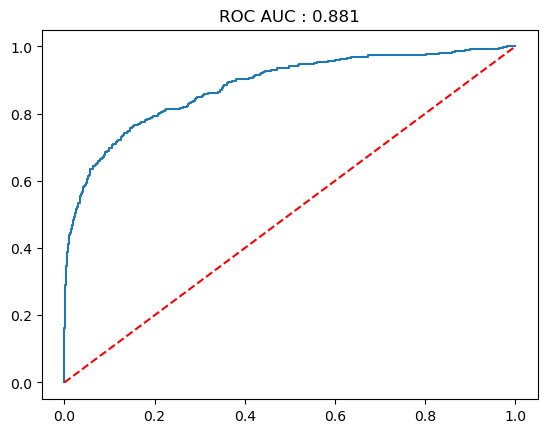

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279
7,"XGBClassifier(base_score=None, booster=None, c...",0.932757,0.441955,0.761404,0.559278,0.525641
8,BaggingClassifier(),0.924105,0.384929,0.692308,0.494764,0.457324
9,"StackingClassifier(estimators=[('rf',\n ...",0.932560,0.417515,0.782443,0.544489,0.511684


In [57]:
model_validation(voting_clf,xtrain,ytrain,xtest,ytest)

In [58]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=6, class_weight='balanced')),
        ('xgb', XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05, scale_pos_weight=4)),
        ('lgbm', LGBMClassifier(n_estimators=200, learning_rate=0.05, class_weight='balanced'))
    ],
    voting='soft',
    weights=[1, 1.5, 2]  # Adjust based on model performance
)

[LightGBM] [Info] Number of positive: 1963, number of negative: 18380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 20343, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
confusion_matrix : 
 [[4162  433]
 [ 155  336]]
classification_report : 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      4595
           1       0.44      0.68      0.53       491

    accuracy                           0.88      5086
   macro avg       0.70      0.80      0.73      5086
weighted avg       0.91      0.88      0.90      5086



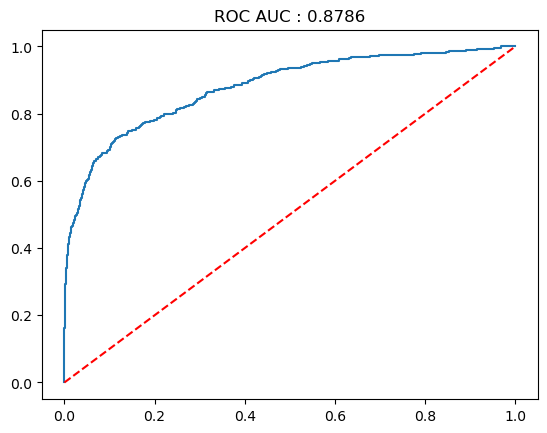

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279
7,"XGBClassifier(base_score=None, booster=None, c...",0.932757,0.441955,0.761404,0.559278,0.525641
8,BaggingClassifier(),0.924105,0.384929,0.692308,0.494764,0.457324
9,"StackingClassifier(estimators=[('rf',\n ...",0.932560,0.417515,0.782443,0.544489,0.511684


In [59]:
model_validation(voting_clf,xtrain,ytrain,xtest,ytest)

In [60]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_best),
        ('xgb', xgb_best),
        ('gb', gb_best),
        ('lgbm', lgbm_best)
    ],
    voting='soft',
    weights=[1, 4, 1, 3]  # Adjust based on model performance
)

[LightGBM] [Info] Number of positive: 1963, number of negative: 18380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 20343, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096495 -> initscore=-2.236789
[LightGBM] [Info] Start training from score -2.236789
confusion_matrix : 
 [[4472  123]
 [ 239  252]]
classification_report : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      4595
           1       0.67      0.51      0.58       491

    accuracy                           0.93      5086
   macro avg       0.81      0.74      0.77      5086
weighted avg       0.92      0.93      0.92      5086



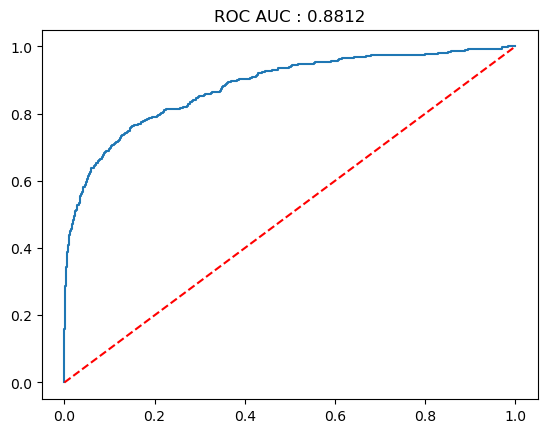

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279
7,"XGBClassifier(base_score=None, booster=None, c...",0.932757,0.441955,0.761404,0.559278,0.525641
8,BaggingClassifier(),0.924105,0.384929,0.692308,0.494764,0.457324
9,"StackingClassifier(estimators=[('rf',\n ...",0.932560,0.417515,0.782443,0.544489,0.511684


In [61]:
model_validation(voting_clf,xtrain,ytrain,xtest,ytest)

In [62]:
voting_clf = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=3,min_samples_split=2,class_weight='balanced')),
        ('xgb', XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05, scale_pos_weight=4)),
        ('lgbm', LGBMClassifier(n_estimators=200, learning_rate=0.05, class_weight='balanced'))
    ],
    voting='soft',
    weights=[1, 1.5, 2] 
)

[LightGBM] [Info] Number of positive: 1963, number of negative: 18380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 20343, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
confusion_matrix : 
 [[4144  451]
 [ 148  343]]
classification_report : 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      4595
           1       0.43      0.70      0.53       491

    accuracy                           0.88      5086
   macro avg       0.70      0.80      0.73      5086
weighted avg       0.91      0.88      0.89      5086



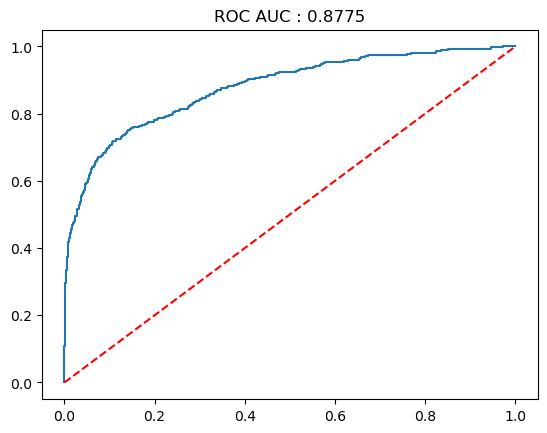

Do you want to save this model? Y/N : y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.911325,0.215886,0.616279,0.319759,0.283889
1,DecisionTreeClassifier(),0.899331,0.474542,0.478439,0.476483,0.420795
2,DecisionTreeClassifier(class_weight='balanced'...,0.829925,0.733198,0.329068,0.454259,0.370347
3,RandomForestClassifier(),0.931380,0.384929,0.800847,0.519945,0.487844
4,KNeighborsClassifier(metric='euclidean'),0.910932,0.283096,0.579167,0.380301,0.338359
5,GaussianNB(),0.920959,0.242363,0.798658,0.371875,0.342311
6,AdaBoostClassifier(),0.931184,0.362525,0.827907,0.504249,0.473279
7,"XGBClassifier(base_score=None, booster=None, c...",0.932757,0.441955,0.761404,0.559278,0.525641
8,BaggingClassifier(),0.924105,0.384929,0.692308,0.494764,0.457324
9,"StackingClassifier(estimators=[('rf',\n ...",0.932560,0.417515,0.782443,0.544489,0.511684


In [63]:
model_validation(voting_clf,xtrain,ytrain,xtest,ytest)

In [64]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_best),
        ('xgb', xgb_best),
        ('lgb', lgbm_best)
    ],
    voting='soft',
    weights=[1,3,1]  # Adjust based on model performance
)

[LightGBM] [Info] Number of positive: 1963, number of negative: 18380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 20343, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.096495 -> initscore=-2.236789
[LightGBM] [Info] Start training from score -2.236789
confusion_matrix : 
 [[4410  185]
 [ 213  278]]
classification_report : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      4595
           1       0.60      0.57      0.58       491

    accuracy                           0.92      5086
   macro avg       0.78      0.76      0.77      5086
weighted avg       0.92      0.92      0.92      5086



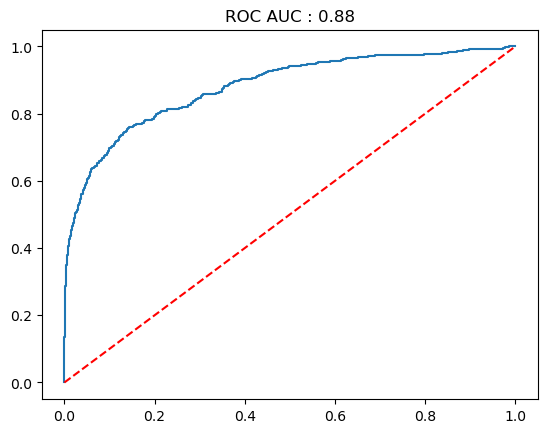

Do you want to save this model? Y/N : n


In [65]:
model_validation(voting_clf,xtrain,ytrain,xtest,ytest)

In [81]:
voting_clf = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=3,min_samples_split=2,class_weight='balanced')),
        ('xgb', XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05, scale_pos_weight=7)),
        ('lgbm', LGBMClassifier(n_estimators=200, learning_rate=0.05, class_weight='balanced'))
    ],
    voting='soft',
    weights=[1,2, 2] 
)

[LightGBM] [Info] Number of positive: 1963, number of negative: 18380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 20343, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
confusion_matrix : 
 [[4089  506]
 [ 136  355]]
classification_report : 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      4595
           1       0.41      0.72      0.53       491

    accuracy                           0.87      5086
   macro avg       0.69      0.81      0.73      5086
weighted avg       0.91      0.87      0.89      5086



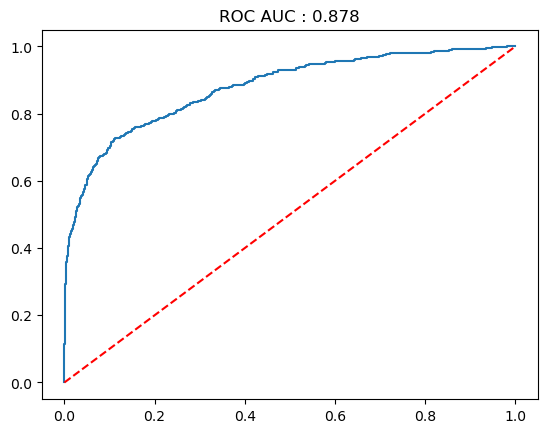

Do you want to save this model? Y/N : n


In [82]:
model_validation(voting_clf,xtrain,ytrain,xtest,ytest)

In [83]:
final_model = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=3,min_samples_split=2,class_weight='balanced')),
        ('xgb', XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05, scale_pos_weight=7)),
        ('lgbm', LGBMClassifier(n_estimators=200, learning_rate=0.05, class_weight='balanced'))
    ],
    voting='soft',
    weights=[1,2, 2] 
)

In [84]:
final_model.fit(xtrain,ytrain)

[LightGBM] [Info] Number of positive: 1963, number of negative: 18380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 20343, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=6,
                                                     min_samples_leaf=3)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            fe...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm',
                              LGBMClassifier(class_weight='balanced',
                                             learning_rate=0.05,
                                             n_estimators=200))],
                 voting='soft', weights=[1, 2, 2])

In [85]:
ypred = final_model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      4595
           1       0.41      0.72      0.53       491

    accuracy                           0.87      5086
   macro avg       0.69      0.81      0.73      5086
weighted avg       0.91      0.87      0.89      5086



In [86]:
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [6, 8, 10],
    'min_samples_leaf': [3, 5, 7],
}

xgb_params = {
    'n_estimators': [200, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.03, 0.05, 0.07],
    'scale_pos_weight': [7, 8, 9]  
}

lgbm_params = {
    'n_estimators': [200, 300],
    'learning_rate': [0.03, 0.05],
    'num_leaves': [20, 30, 40],
}

In [87]:
dt = DecisionTreeClassifier(class_weight='balanced')
xgb = XGBClassifier()
lgbm = LGBMClassifier(class_weight='balanced')

In [102]:
# Perform GridSearchCV on each model
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='f1', n_jobs=-1)
dt_grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10],
                         'min_samples_leaf': [3, 5, 7]},
             scoring='f1')

In [103]:
best_dt = dt_grid.best_estimator_

In [104]:
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='f1', n_jobs=-1)
xgb_grid.fit(xtrain, ytrain)
best_xgb = xgb_grid.best_estimator_

In [105]:
lgbm_grid = GridSearchCV(lgbm, lgbm_params, cv=5, scoring='f1', n_jobs=-1)
lgbm_grid.fit(xtrain, ytrain)
best_lgbm = lgbm_grid.best_estimator_

[LightGBM] [Info] Number of positive: 1963, number of negative: 18380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 20343, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


In [119]:
final_model = VotingClassifier(
    estimators=[
        ('dt', best_dt),
        ('xgb', best_xgb),
        ('lgbm', best_lgbm)
    ],
    voting='soft',
    weights=[1, 2, 2]  # Adjust if needed
)

In [120]:
final_model.fit(xtrain,ytrain)

[LightGBM] [Info] Number of positive: 1963, number of negative: 18380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 20343, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=6,
                                                     min_samples_leaf=5)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gam...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm',
                              LGBMClassifier(class_weight='balanced',
                                             learning_rate=0.05,
                                             n_estimators=300,
                                             num_leaves=40))],
                 voting='soft', weights=[1, 2, 2])

In [122]:
ypred_s = final_model.predict_proba(xtest)[:,1]
ypred = (ypred_s > 0.5).astype(int)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      4595
           1       0.43      0.70      0.53       491

    accuracy                           0.88      5086
   macro avg       0.70      0.80      0.73      5086
weighted avg       0.91      0.88      0.89      5086



In [123]:
cohen_kappa_score(ytest,ypred)

0.4704486213098673

In [114]:
rf_importance = final_model.estimators_[0].feature_importances_
xgb_importance = final_model.estimators_[1].feature_importances_
lgbm_importance = final_model.estimators_[2].feature_importances_

# Define model weights (same as in VotingClassifier)
weights = np.array([1, 2, 2])

# Normalize weights to sum to 1
weights = weights / weights.sum()

# Compute weighted average of feature importances
combined_importance = (rf_importance * weights[0] +
                       xgb_importance * weights[1] +
                       lgbm_importance * weights[2])

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': xtrain.columns,
    'Importance': combined_importance
}).sort_values(by='Importance', ascending=False)


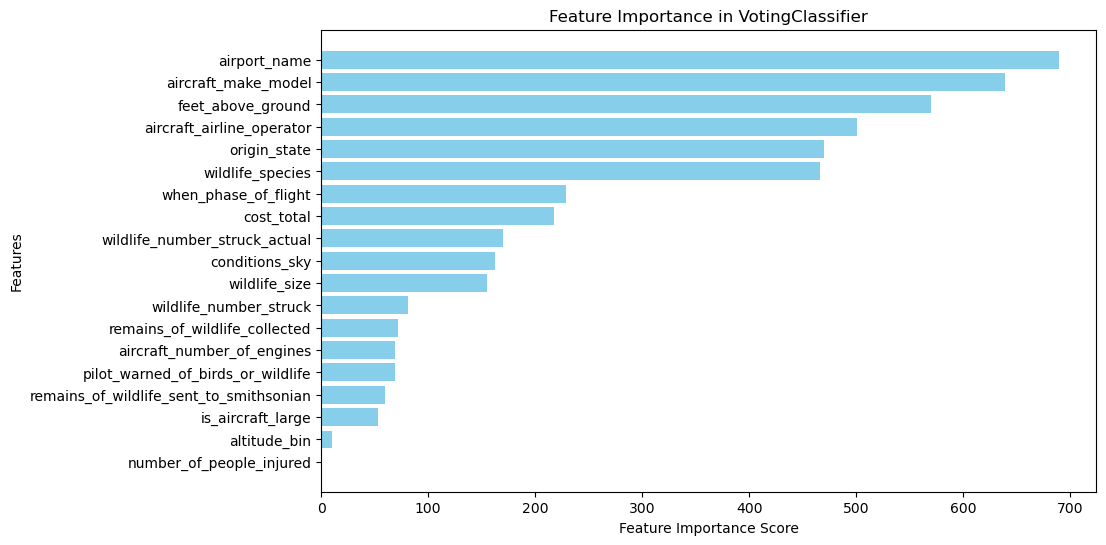

In [115]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in VotingClassifier")
plt.gca().invert_yaxis()
plt.show()

In [116]:
feature_importance_df

,Feature,Importance
0,airport_name,689.615413
2,aircraft_make_model,638.809533
16,feet_above_ground,570.020269
6,aircraft_airline_operator,500.808080
7,origin_state,469.607202
13,wildlife_species,466.426567
8,when_phase_of_flight,228.410149
15,cost_total,217.707514
4,wildlife_number_struck_actual,169.608188
12,conditions_sky,162.006333
